# Detect Anomalies Using Density Based Clustering

## Exercises:

file name: `clustering_anomaly_detection.py` or `clustering_anomaly_detection.ipynb`

### Clustering - DBSCAN

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools

# my imports
import wrangle_original as wo
import wrangle_clustering as wc
from env import get_db_url

# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler

### 1. Use DBSCAN to detect anomalies in other products from the `customers` dataset. The database name is `grocery_db`.

In [2]:
df = wo.get_grocery_data()

csv file found and loaded


In [3]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
customer_id                                                                    
0                  2       3  12669  9656     7561     214              2674   
1                  2       3   7057  9810     9568    1762              3293   
2                  2       3   6353  8808     7684    2405              3516   
3                  1       3  13265  1196     4221    6404               507   
4                  2       3  22615  5410     7198    3915              1777   

             Delicassen  
customer_id              
0                  1338  
1                  1776  
2                  7844  
3                  1788  
4                  5185

## Follow the Steps

## Step 1: Select variables you want to cluster

In [4]:
# Cluster on all or a selected subset of features
frozen_detergents_delicassen = df[['Frozen', 'Detergents_Paper', 'Delicassen']]
frozen_detergents_delicassen.head()

Frozen  Detergents_Paper  Delicassen
customer_id                                      
0               214              2674        1338
1              1762              3293        1776
2              2405              3516        7844
3              6404               507        1788
4              3915              1777        5185

## Step 2: Convert to array & dtype float

In [5]:
frozen_detergents_delicassen.iloc[0]

Frozen               214
Detergents_Paper    2674
Delicassen          1338
Name: 0, dtype: int64

In [6]:
frozen_detergents_delicassen.values.astype("float32", copy=False)[0]

array([ 214., 2674., 1338.], dtype=float32)

In [7]:
#convert to an array and turn into float
np_array = frozen_detergents_delicassen.values.astype("float32", copy=False)

## Step 3: Scale to standard normal

In [8]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
fdd_scaled = mms.fit_transform(np_array)

fdd_scaled

array([[0.0031063 , 0.0654272 , 0.02784731],
       [0.02854842, 0.08058985, 0.03698373],
       [0.03911643, 0.08605233, 0.16355862],
       ...,
       [0.00677142, 0.36346266, 0.03888194],
       [0.01664914, 0.00404174, 0.04426366],
       [0.00065742, 0.01161082, 0.00102211]], dtype=float32)

In [9]:
frozen_detergents_delicassen.columns

Index(['Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [10]:
["Scaled_"+column for column in frozen_detergents_delicassen.columns]

['Scaled_Frozen', 'Scaled_Detergents_Paper', 'Scaled_Delicassen']

In [11]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_"+column for column in frozen_detergents_delicassen.columns]

In [12]:
# Save a copy of the original dataframe
original_df = df.copy()

In [13]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(fdd_scaled, columns=scaled_columns)

In [14]:
scaled_df

Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen
0         0.003106                 0.065427           0.027847
1         0.028548                 0.080590           0.036984
2         0.039116                 0.086052           0.163559
3         0.104842                 0.012346           0.037234
4         0.063934                 0.043455           0.108093
..             ...                      ...                ...
435       0.215469                 0.004385           0.045912
436       0.073713                 0.002205           0.048874
437       0.006771                 0.363463           0.038882
438       0.016649                 0.004042           0.044264
439       0.000657                 0.011611           0.001022

[440 rows x 3 columns]

In [15]:
df.merge(scaled_df, on=df.index)

key_0  Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        0        2       3  12669   9656     7561     214              2674   
1        1        2       3   7057   9810     9568    1762              3293   
2        2        2       3   6353   8808     7684    2405              3516   
3        3        1       3  13265   1196     4221    6404               507   
4        4        2       3  22615   5410     7198    3915              1777   
..     ...      ...     ...    ...    ...      ...     ...               ...   
435    435        1       3  29703  12051    16027   13135               182   
436    436        1       3  39228   1431      764    4510                93   
437    437        2       3  14531  15488    30243     437             14841   
438    438        1       3  10290   1981     2232    1038               168   
439    439        1       3   2787   1698     2510      65               477   

     Delicassen  Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen  
0          1338       0.003106                 0.065427           0.027847  
1          1776       0.028548                 0.080590           0.036984  
2          7844       0.039116                 0.086052           0.163559  
3          1788       0.104842                 0.012346           0.037234  
4          5185       0.063934                 0.043455           0.108093  
..          ...            ...                      ...                ...  
435        2204       0.215469                 0.004385           0.045912  
436        2346       0.073713                 0.002205           0.048874  
437        1867       0.006771                 0.363463           0.038882  
438        2125       0.016649                 0.004042           0.044264  
439          52       0.000657                 0.011611           0.001022  

[440 rows x 12 columns]

In [16]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=['key_0'])

In [17]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen  
0        1338       0.003106                 0.065427           0.027847  
1        1776       0.028548                 0.080590           0.036984  
2        7844       0.039116                 0.086052           0.163559  
3        1788       0.104842                 0.012346           0.037234  
4        5185       0.063934                 0.043455           0.108093

## Step 4: Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a> object and fit

In [18]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=20)

# Fit the object
dbsc.fit(fdd_scaled)

DBSCAN(eps=0.1, min_samples=20)

# Step 5: Extract labels


**NOTE:**
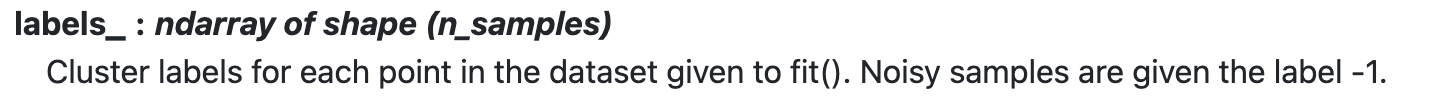

In [19]:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

## Step 6: Add labels back to original dataframe

In [20]:
# Assign the cluster labels
df['fdd_labels'] = dbsc.labels_

In [21]:
#see what this dataframe looks like
df.sample(5)

Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
47         2       3  44466  54259    55571    7782             24171   
357        2       3     37   1275    22272     137              6747   
229        1       1   8656   2746     2501    6845               694   
165        2       3  15615  12653    19858    4425              7108   
436        1       3  39228   1431      764    4510                93   

     Delicassen  Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen  \
47         6465       0.127490                 0.592005           0.134793   
357         110       0.001841                 0.165197           0.002232   
229         980       0.112090                 0.016926           0.020380   
165        2379       0.072316                 0.174040           0.049562   
436        2346       0.073713                 0.002205           0.048874   

     fdd_labels  
47           -1  
357           0  
229           0  
165           0  
436           0

# Step 7: Explore

<div class="alert alert-block alert-info">
<b>Remember:</b> 
<br>
    
- <b>-1</b>: refers to data that does <u>not</u> fall into a cluster
- <b>0</b>: refers to data that does fall into a cluster
</div>

In [22]:
#let's see what labels holds
df.fdd_labels.value_counts()

 0    423
-1     17
Name: fdd_labels, dtype: int64

In [23]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen  \
0        1338       0.003106                 0.065427           0.027847   
1        1776       0.028548                 0.080590           0.036984   
2        7844       0.039116                 0.086052           0.163559   
3        1788       0.104842                 0.012346           0.037234   
4        5185       0.063934                 0.043455           0.108093   

   fdd_labels  
0           0  
1           0  
2           0  
3           0  
4           0

In [24]:
for combination in itertools.combinations(frozen_detergents_delicassen.columns,2):
    print(combination)

('Frozen', 'Detergents_Paper')
('Frozen', 'Delicassen')
('Detergents_Paper', 'Delicassen')


In [25]:
combination[0]

'Detergents_Paper'

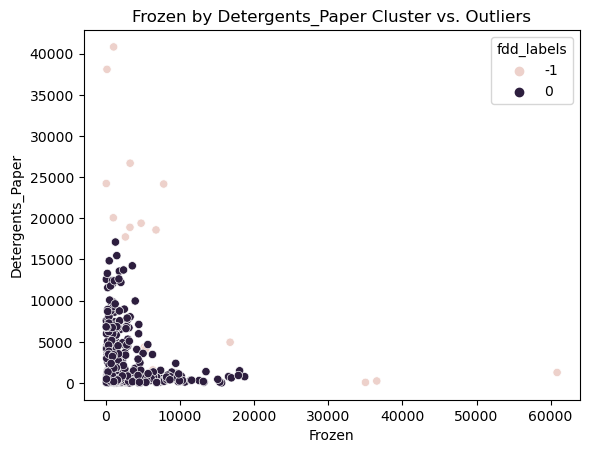

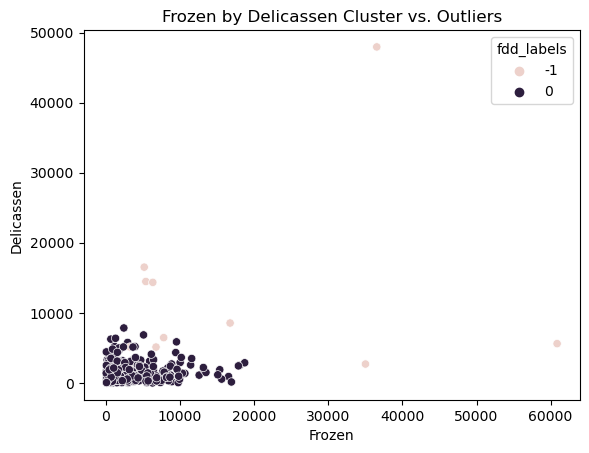

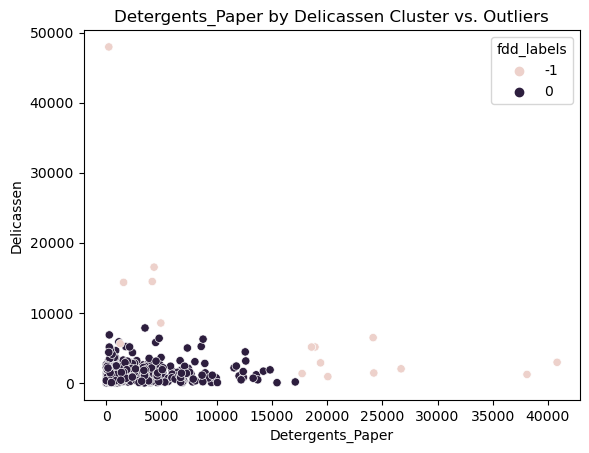

In [26]:
for combination in itertools.combinations(frozen_detergents_delicassen.columns,2):
    sns.scatterplot(df[combination[0]], df[combination[1]], hue=df.fdd_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Outliers")
    plt.show()

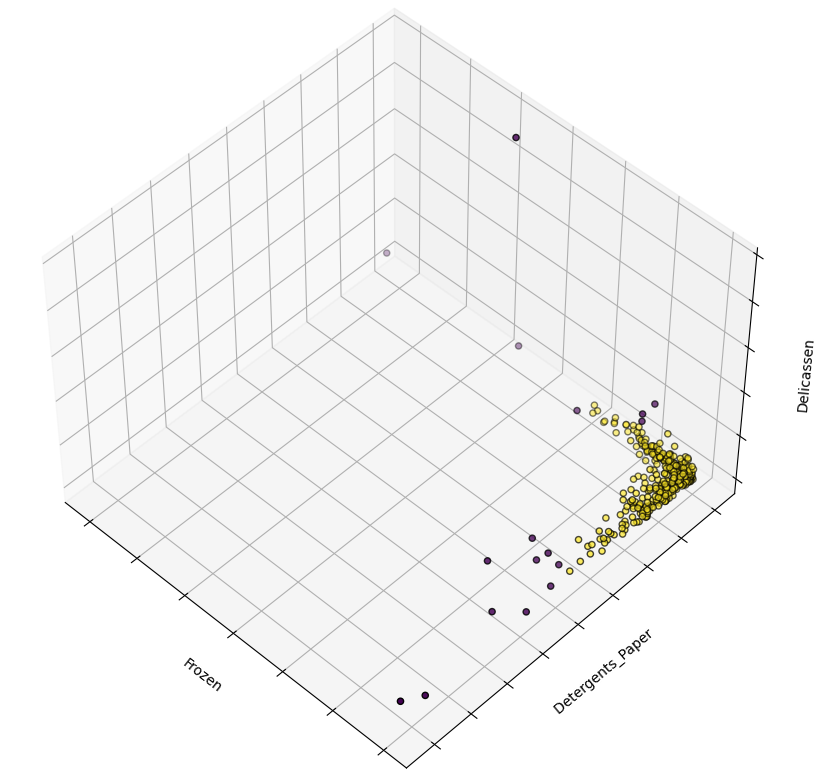

In [27]:
from mpl_toolkits.mplot3d import Axes3D

    
# Create a figure with a size of 8x8
fig = plt.figure(1, figsize=(8, 8))

# Create a 3D axes object with specified rect, elevation, and azimuth
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# Plot the points using the frozen, detergents, delicassen columns from the DataFrame
# Color the points based on the gmf_labels column and add black edges
ax.scatter(df.Frozen, df.Detergents_Paper, df.Delicassen, c=df.fdd_labels, edgecolor='k')

# Remove tick labels for the x-axis, y-axis, and z-axis
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Set labels for the x-axis, y-axis, and z-axis
ax.set_xlabel('Frozen')
ax.set_ylabel('Detergents_Paper ')
ax.set_zlabel('Delicassen')

# Display the plot
plt.show()


### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the `curriculum_logs` database.

In [28]:
# create url (same way as before)
# url = get_db_url('logs')

SQL: curriculum_logs

select * from logs

In [29]:
# df_logs = pd.read_sql('select * from api_access', url)

In [74]:
def check_file_exists(fn, query, url):
    """
    check if file exists in my local directory, if not, pull from sql db
    return dataframe
    """
    if os.path.isfile(fn):
        print('csv file found and loaded')
        return pd.read_csv(fn, index_col=0)
    else: 
        print('creating df and exporting csv')
        df = pd.read_sql(query, url)
        df.to_csv(fn)
        return df

    

In [75]:
def get_logs_data():
    """
    This function will:
        - from the connection made to the `logs` DB
            - using the `get_db_url` from my wrangle module.
            
    
    """
    # How to import a database from MySQL
    url = get_db_url('logs')
    query = '''
        select * from api_access;
        '''
    filename = 'logs.csv'
    df = check_file_exists(filename, query, url)
    
    return df

In [76]:
get_logs_data()

creating df and exporting csv


entry
0      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2      97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3      97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4      97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...
...                                                  ...
13969  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13970  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13971  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13972  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13973  97.105.19.58 - - [17/Apr/2019:12:55:14 +0000] ...

[13974 rows x 1 columns]

In [30]:
df_logs

entry
0      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
1      97.105.19.58 - - [16/Apr/2019:19:34:42 +0000] ...
2      97.105.19.58 - - [16/Apr/2019:19:34:44 +0000] ...
3      97.105.19.58 - - [16/Apr/2019:19:34:46 +0000] ...
4      97.105.19.58 - - [16/Apr/2019:19:34:48 +0000] ...
...                                                  ...
13969  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13970  97.105.19.58 - - [17/Apr/2019:12:55:12 +0000] ...
13971  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13972  97.105.19.58 - - [17/Apr/2019:12:55:13 +0000] ...
13973  97.105.19.58 - - [17/Apr/2019:12:55:14 +0000] ...

[13974 rows x 1 columns]

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
# pd.set_option('display.max_rows', None)

### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the <a href="https://ds.codeup.com/clustering/explore/#exercises">clustering evaluation exercises</a> (single unit properties with a logerror).

In [33]:
df_z = wc.get_zillow_data()
df_z

csv file found and loaded


id  parcelid  airconditioningtypeid  architecturalstyletypeid  \
0      1727539  14297519                    NaN                       NaN   
1      1387261  17052889                    NaN                       NaN   
2        11677  14186244                    NaN                       NaN   
3      2288172  12177905                    NaN                       NaN   
4       781532  12095076                    1.0                       NaN   
...        ...       ...                    ...                       ...   
52314  2274245  12412492                    NaN                       NaN   
52315   673515  11000655                    NaN                       NaN   
52316  2968375  17239384                    NaN                       NaN   
52317  1843709  12773139                    1.0                       NaN   
52318  1187175  12826780                    NaN                       NaN   

       basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0               NaN          3.5         4.0                  NaN   
1               NaN          1.0         2.0                  NaN   
2               NaN          2.0         3.0                  NaN   
3               NaN          3.0         4.0                  NaN   
4               NaN          3.0         4.0                  NaN   
...             ...          ...         ...                  ...   
52314           NaN          2.0         4.0                  NaN   
52315           NaN          2.0         2.0                  NaN   
52316           NaN          2.0         4.0                  NaN   
52317           NaN          1.0         3.0                  NaN   
52318           NaN          2.0         3.0                  NaN   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                        NaN                3.5         NaN   
1                        NaN                1.0         NaN   
2                        NaN                2.0         NaN   
3                        8.0                3.0         NaN   
4                        9.0                3.0         NaN   
...                      ...                ...         ...   
52314                    6.0                2.0         NaN   
52315                    6.0                2.0         NaN   
52316                    NaN                2.0         NaN   
52317                    4.0                1.0         NaN   
52318                    6.0                2.0         NaN   

       finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                           NaN                        3100.0   
1                        1465.0                        1465.0   
2                           NaN                        1243.0   
3                           NaN                        2376.0   
4                           NaN                        2962.0   
...                         ...                           ...   
52314                       NaN                        1633.0   
52315                       NaN                        1286.0   
52316                    1612.0                        1612.0   
52317                       NaN                        1032.0   
52318                       NaN                        1762.0   

       finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                    3100.0                   NaN                   NaN   
1                    1465.0                   NaN                   NaN   
2                    1243.0                   NaN                   NaN   
3                    2376.0                   NaN                   NaN   
4                    2962.0                   NaN                   NaN   
...                     ...                   ...                   ...   
52314                1633.0                   NaN                   NaN   
52315                1286.0                   NaN                   NaN   
52316                1612.0                  

In [34]:
col_to_remove = ['parcelid','airconditioningtypeid','architecturalstyletypeid','buildingclasstypeid','buildingqualitytypeid',
                 'decktypeid','finishedfloor1squarefeet','finishedsquarefeet12','finishedsquarefeet13','finishedsquarefeet15',
                 'finishedsquarefeet50','finishedsquarefeet6','heatingorsystemtypeid','poolsizesum','pooltypeid10','pooltypeid2',
                 'pooltypeid7','roomcnt','storytypeid','typeconstructiontypeid','unitcnt','yardbuildingsqft17','yardbuildingsqft26',
                 'fireplaceflag','calculatedbathnbr','finishedsquarefeet12','propertyzoningdesc','rawcensustractandblock','taxamount',
                 'landtaxvaluedollarcnt','regionidzip','censustractandblock','propertycountylandusecode','propertylandusetypeid']

In [35]:
# strips the leading and trailing spaces from the column names
df.columns = df.columns.str.strip()

In [36]:
df_z = wc.data_prep(df_z, col_to_remove, prop_required_columns=0.5, prop_required_rows=0.75)
df_z

id  bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet    fips  \
0      1727539          3.5         4.0                        3100.0  6059.0   
1      1387261          1.0         2.0                        1465.0  6111.0   
2        11677          2.0         3.0                        1243.0  6059.0   
3      2288172          3.0         4.0                        2376.0  6037.0   
4       781532          3.0         4.0                        2962.0  6037.0   
...        ...          ...         ...                           ...     ...   
52314  2274245          2.0         4.0                        1633.0  6037.0   
52315   673515          2.0         2.0                        1286.0  6037.0   
52316  2968375          2.0         4.0                        1612.0  6111.0   
52317  1843709          1.0         3.0                        1032.0  6037.0   
52318  1187175          2.0         3.0                        1762.0  6037.0   

       fullbathcnt    latitude    longitude  lotsizesquarefeet  regionidcity  \
0              3.0  33634931.0 -117869207.0             4506.0       53571.0   
1              1.0  34449266.0 -119281531.0            12647.0       13091.0   
2              2.0  33886168.0 -117823170.0             8432.0       21412.0   
3              3.0  34245180.0 -118240722.0            13038.0      396551.0   
4              3.0  34145202.0 -118179824.0            63000.0       47019.0   
...            ...         ...          ...                ...           ...   
52314          2.0  33870815.0 -118070858.0             4630.0       30267.0   
52315          2.0  34245368.0 -118282383.0            47405.0       12447.0   
52316          2.0  34300140.0 -118706327.0            12105.0       27110.0   
52317          1.0  34040895.0 -118038169.0             5074.0       36502.0   
52318          2.0  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  \
0              1286.0     1998.0                    485713.0   
1              2061.0     1967.0                     88000.0   
2              1286.0     1962.0                     85289.0   
3              3101.0     1970.0                    108918.0   
4              3101.0     1950.0                    276684.0   
...               ...        ...                         ...   
52314          3101.0     1962.0                    125466.0   
52315          3101.0     1940.0                     70917.0   
52316          2061.0     1964.0                     50683.0   
52317          3101.0     1954.0                     32797.0   
52318          3101.0     1955.0                    140000.0   

       taxvaluedollarcnt  assessmentyear  logerror transactiondate  \
0              1023282.0          2016.0  0.025595      2017-01-01   
1               464000.0          2016.0  0.055619      2017-01-01   
2               564778.0          2016.0  0.005383      2017-01-01   
3               145143.0          2016.0 -0.103410      2017-01-01   
4               773303.0          2016.0 -0.001011      2017-01-01   
...                  ...             ...       ...             ...   
52314           346534.0          2016.0  0.001082      2017-09-19   
52315           354621.0          2016.0  0.020615      2017-09-20   
52316            67205.0          2016.0  0.013209      2017-09-21   
52317            49546.0          2016.0  0.037129      2017-09-21   
52318           522000.0          2016.0  0.007204      2017-09-25   

      heatingorsystemdesc        propertylandusedesc  
0                     NaN  Single Family Residential  
1                     NaN  Single Family Residential  
2                     NaN  Single Family Residential  
3                 Central  Single Family Residential  
4                 Central  Single Family Residential  
...                   ...                        ...  
52314             Central  Single Family Residential  
52315             Central  S

In [37]:
# rename columns
df_z.columns
df_z = df_z.rename(columns={'id':'customer_id', 'bedroomcnt':'bedrooms', 'bathroomcnt':'bathrooms',
                        'calculatedfinishedsquarefeet':'area','taxvaluedollarcnt':'property_value',
                        'fips':'county'})
df_z

customer_id  bathrooms  bedrooms    area  county  fullbathcnt  \
0          1727539        3.5       4.0  3100.0  6059.0          3.0   
1          1387261        1.0       2.0  1465.0  6111.0          1.0   
2            11677        2.0       3.0  1243.0  6059.0          2.0   
3          2288172        3.0       4.0  2376.0  6037.0          3.0   
4           781532        3.0       4.0  2962.0  6037.0          3.0   
...            ...        ...       ...     ...     ...          ...   
52314      2274245        2.0       4.0  1633.0  6037.0          2.0   
52315       673515        2.0       2.0  1286.0  6037.0          2.0   
52316      2968375        2.0       4.0  1612.0  6111.0          2.0   
52317      1843709        1.0       3.0  1032.0  6037.0          1.0   
52318      1187175        2.0       3.0  1762.0  6037.0          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
0      33634931.0 -117869207.0             4506.0       53571.0   
1      34449266.0 -119281531.0            12647.0       13091.0   
2      33886168.0 -117823170.0             8432.0       21412.0   
3      34245180.0 -118240722.0            13038.0      396551.0   
4      34145202.0 -118179824.0            63000.0       47019.0   
...           ...          ...                ...           ...   
52314  33870815.0 -118070858.0             4630.0       30267.0   
52315  34245368.0 -118282383.0            47405.0       12447.0   
52316  34300140.0 -118706327.0            12105.0       27110.0   
52317  34040895.0 -118038169.0             5074.0       36502.0   
52318  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
0              1286.0     1998.0                    485713.0       1023282.0   
1              2061.0     1967.0                     88000.0        464000.0   
2              1286.0     1962.0                     85289.0        564778.0   
3              3101.0     1970.0                    108918.0        145143.0   
4              3101.0     1950.0                    276684.0        773303.0   
...               ...        ...                         ...             ...   
52314          3101.0     1962.0                    125466.0        346534.0   
52315          3101.0     1940.0                     70917.0        354621.0   
52316          2061.0     1964.0                     50683.0         67205.0   
52317          3101.0     1954.0                     32797.0         49546.0   
52318          3101.0     1955.0                    140000.0        522000.0   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
0              2016.0  0.025595      2017-01-01                 NaN   
1              2016.0  0.055619      2017-01-01                 NaN   
2              2016.0  0.005383      2017-01-01                 NaN   
3              2016.0 -0.103410      2017-01-01             Central   
4              2016.0 -0.001011      2017-01-01             Central   
...               ...       ...             ...                 ...   
52314          2016.0  0.001082      2017-09-19             Central   
52315          2016.0  0.020615      2017-09-20             Central   
52316          2016.0  0.013209      2017-09-21                 NaN   
52317          2016.0  0.037129      2017-09-21             Central   
52318          2016.0  0.007204      2017-09-25             Central   

             propertylandusedesc  
0      Single Family Residential  
1      Single Family Residential  
2      Single Family Residential  
3      Single Family Residential  
4      Single Family Residential  
...                          ...  
52314  Single Family Residential  
52315  Single Family Residential  
52316  Single Family Residential  
52317  Single Family Residential  
52318  Single Family Residential  

[52316 rows x 19 columns]

In [38]:
#     # Look at properties less than .5 and over 4.5 bathrooms (Outliers were removed)
#     df = df[~(df['bathrooms'] < .5) & ~(df['bathrooms'] > 4.5)]

#     # Look at properties less than 1906.5 and over 2022.5 years (Outliers were removed)
#     df = df[~(df['yearbuilt'] < 1906.5) & ~(df['yearbuilt'] > 2022.5)]

#     # Look at properties less than -289.0 and over 3863.0 area (Outliers were removed)
#     df = df[~(df['area'] < -289.0) & ~(df['area'] > 3863.0)]

#     # Look at properties less than -444576.5 and over 1257627.5 property value (Outliers were removed)
#     df = df[~(df['property_value'] < -444576.5) &  ~(df['property_value'] > 1257627.5)]

In [39]:
# replace missing values with "0"
df_z = df_z.fillna({'bedrooms':0,'bathrooms':0,'area':0,'property_value':0,'county':0})
df_z

customer_id  bathrooms  bedrooms    area  county  fullbathcnt  \
0          1727539        3.5       4.0  3100.0  6059.0          3.0   
1          1387261        1.0       2.0  1465.0  6111.0          1.0   
2            11677        2.0       3.0  1243.0  6059.0          2.0   
3          2288172        3.0       4.0  2376.0  6037.0          3.0   
4           781532        3.0       4.0  2962.0  6037.0          3.0   
...            ...        ...       ...     ...     ...          ...   
52314      2274245        2.0       4.0  1633.0  6037.0          2.0   
52315       673515        2.0       2.0  1286.0  6037.0          2.0   
52316      2968375        2.0       4.0  1612.0  6111.0          2.0   
52317      1843709        1.0       3.0  1032.0  6037.0          1.0   
52318      1187175        2.0       3.0  1762.0  6037.0          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
0      33634931.0 -117869207.0             4506.0       53571.0   
1      34449266.0 -119281531.0            12647.0       13091.0   
2      33886168.0 -117823170.0             8432.0       21412.0   
3      34245180.0 -118240722.0            13038.0      396551.0   
4      34145202.0 -118179824.0            63000.0       47019.0   
...           ...          ...                ...           ...   
52314  33870815.0 -118070858.0             4630.0       30267.0   
52315  34245368.0 -118282383.0            47405.0       12447.0   
52316  34300140.0 -118706327.0            12105.0       27110.0   
52317  34040895.0 -118038169.0             5074.0       36502.0   
52318  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
0              1286.0     1998.0                    485713.0       1023282.0   
1              2061.0     1967.0                     88000.0        464000.0   
2              1286.0     1962.0                     85289.0        564778.0   
3              3101.0     1970.0                    108918.0        145143.0   
4              3101.0     1950.0                    276684.0        773303.0   
...               ...        ...                         ...             ...   
52314          3101.0     1962.0                    125466.0        346534.0   
52315          3101.0     1940.0                     70917.0        354621.0   
52316          2061.0     1964.0                     50683.0         67205.0   
52317          3101.0     1954.0                     32797.0         49546.0   
52318          3101.0     1955.0                    140000.0        522000.0   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
0              2016.0  0.025595      2017-01-01                 NaN   
1              2016.0  0.055619      2017-01-01                 NaN   
2              2016.0  0.005383      2017-01-01                 NaN   
3              2016.0 -0.103410      2017-01-01             Central   
4              2016.0 -0.001011      2017-01-01             Central   
...               ...       ...             ...                 ...   
52314          2016.0  0.001082      2017-09-19             Central   
52315          2016.0  0.020615      2017-09-20             Central   
52316          2016.0  0.013209      2017-09-21                 NaN   
52317          2016.0  0.037129      2017-09-21             Central   
52318          2016.0  0.007204      2017-09-25             Central   

             propertylandusedesc  
0      Single Family Residential  
1      Single Family Residential  
2      Single Family Residential  
3      Single Family Residential  
4      Single Family Residential  
...                          ...  
52314  Single Family Residential  
52315  Single Family Residential  
52316  Single Family Residential  
52317  Single Family Residential  
52318  Single Family Residential  

[52316 rows x 19 columns]

In [40]:
# drop any nulls in the dataset
df_z = df_z.dropna()
df_z

customer_id  bathrooms  bedrooms    area  county  fullbathcnt  \
3          2288172        3.0       4.0  2376.0  6037.0          3.0   
4           781532        3.0       4.0  2962.0  6037.0          3.0   
6          1246926        3.0       4.0  3039.0  6037.0          3.0   
7          1639362        3.0       4.0  2540.0  6037.0          3.0   
11          571930        1.0       2.0  1146.0  6037.0          1.0   
...            ...        ...       ...     ...     ...          ...   
52313      1373391        2.0       3.0  1570.0  6037.0          2.0   
52314      2274245        2.0       4.0  1633.0  6037.0          2.0   
52315       673515        2.0       2.0  1286.0  6037.0          2.0   
52317      1843709        1.0       3.0  1032.0  6037.0          1.0   
52318      1187175        2.0       3.0  1762.0  6037.0          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
3      34245180.0 -118240722.0            13038.0      396551.0   
4      34145202.0 -118179824.0            63000.0       47019.0   
6      33960230.0 -118006914.0            20028.0       14634.0   
7      34434971.0 -118464390.0            10384.0       54311.0   
11     34024040.0 -118159090.0             4657.0       17882.0   
...           ...          ...                ...           ...   
52313  34194943.0 -118629218.0             7499.0       12447.0   
52314  33870815.0 -118070858.0             4630.0       30267.0   
52315  34245368.0 -118282383.0            47405.0       12447.0   
52317  34040895.0 -118038169.0             5074.0       36502.0   
52318  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
3              3101.0     1970.0                    108918.0        145143.0   
4              3101.0     1950.0                    276684.0        773303.0   
6              3101.0     1970.0                    177527.0        220583.0   
7              3101.0     1999.0                    271715.0        430108.0   
11             3101.0     1939.0                    127960.0        273745.0   
...               ...        ...                         ...             ...   
52313          3101.0     1958.0                     46784.0         72026.0   
52314          3101.0     1962.0                    125466.0        346534.0   
52315          3101.0     1940.0                     70917.0        354621.0   
52317          3101.0     1954.0                     32797.0         49546.0   
52318          3101.0     1955.0                    140000.0        522000.0   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
3              2016.0 -0.103410      2017-01-01             Central   
4              2016.0 -0.001011      2017-01-01             Central   
6              2016.0 -0.040966      2017-01-02             Central   
7              2016.0  0.005963      2017-01-02             Central   
11             2016.0 -0.035085      2017-01-02          Floor/Wall   
...               ...       ...             ...                 ...   
52313          2016.0  0.081196      2017-09-19             Central   
52314          2016.0  0.001082      2017-09-19             Central   
52315          2016.0  0.020615      2017-09-20             Central   
52317          2016.0  0.037129      2017-09-21             Central   
52318          2016.0  0.007204      2017-09-25             Central   

             propertylandusedesc  
3      Single Family Residential  
4      Single Family Residential  
6      Single Family Residential  
7      Single Family Residential  
11     Single Family Residential  
...                          ...  
52313  Single Family Residential  
52314  Single Family Residential  
52315  Single Family Residential  
52317  Single Family Residential  
52318  Single Family Residential  

[32808 rows x 19 columns]

In [41]:
df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32808 entries, 3 to 52318
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 32808 non-null  int64  
 1   bathrooms                   32808 non-null  float64
 2   bedrooms                    32808 non-null  float64
 3   area                        32808 non-null  float64
 4   county                      32808 non-null  float64
 5   fullbathcnt                 32808 non-null  float64
 6   latitude                    32808 non-null  float64
 7   longitude                   32808 non-null  float64
 8   lotsizesquarefeet           32808 non-null  float64
 9   regionidcity                32808 non-null  float64
 10  regionidcounty              32808 non-null  float64
 11  yearbuilt                   32808 non-null  float64
 12  structuretaxvaluedollarcnt  32808 non-null  float64
 13  property_value              328

In [42]:
# strips the leading and trailing spaces from the column names
df_z.columns = df_z.columns.str.strip()

In [43]:
df_z

customer_id  bathrooms  bedrooms    area  county  fullbathcnt  \
3          2288172        3.0       4.0  2376.0  6037.0          3.0   
4           781532        3.0       4.0  2962.0  6037.0          3.0   
6          1246926        3.0       4.0  3039.0  6037.0          3.0   
7          1639362        3.0       4.0  2540.0  6037.0          3.0   
11          571930        1.0       2.0  1146.0  6037.0          1.0   
...            ...        ...       ...     ...     ...          ...   
52313      1373391        2.0       3.0  1570.0  6037.0          2.0   
52314      2274245        2.0       4.0  1633.0  6037.0          2.0   
52315       673515        2.0       2.0  1286.0  6037.0          2.0   
52317      1843709        1.0       3.0  1032.0  6037.0          1.0   
52318      1187175        2.0       3.0  1762.0  6037.0          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
3      34245180.0 -118240722.0            13038.0      396551.0   
4      34145202.0 -118179824.0            63000.0       47019.0   
6      33960230.0 -118006914.0            20028.0       14634.0   
7      34434971.0 -118464390.0            10384.0       54311.0   
11     34024040.0 -118159090.0             4657.0       17882.0   
...           ...          ...                ...           ...   
52313  34194943.0 -118629218.0             7499.0       12447.0   
52314  33870815.0 -118070858.0             4630.0       30267.0   
52315  34245368.0 -118282383.0            47405.0       12447.0   
52317  34040895.0 -118038169.0             5074.0       36502.0   
52318  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
3              3101.0     1970.0                    108918.0        145143.0   
4              3101.0     1950.0                    276684.0        773303.0   
6              3101.0     1970.0                    177527.0        220583.0   
7              3101.0     1999.0                    271715.0        430108.0   
11             3101.0     1939.0                    127960.0        273745.0   
...               ...        ...                         ...             ...   
52313          3101.0     1958.0                     46784.0         72026.0   
52314          3101.0     1962.0                    125466.0        346534.0   
52315          3101.0     1940.0                     70917.0        354621.0   
52317          3101.0     1954.0                     32797.0         49546.0   
52318          3101.0     1955.0                    140000.0        522000.0   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
3              2016.0 -0.103410      2017-01-01             Central   
4              2016.0 -0.001011      2017-01-01             Central   
6              2016.0 -0.040966      2017-01-02             Central   
7              2016.0  0.005963      2017-01-02             Central   
11             2016.0 -0.035085      2017-01-02          Floor/Wall   
...               ...       ...             ...                 ...   
52313          2016.0  0.081196      2017-09-19             Central   
52314          2016.0  0.001082      2017-09-19             Central   
52315          2016.0  0.020615      2017-09-20             Central   
52317          2016.0  0.037129      2017-09-21             Central   
52318          2016.0  0.007204      2017-09-25             Central   

             propertylandusedesc  
3      Single Family Residential  
4      Single Family Residential  
6      Single Family Residential  
7      Single Family Residential  
11     Single Family Residential  
...                          ...  
52313  Single Family Residential  
52314  Single Family Residential  
52315  Single Family Residential  
52317  Single Family Residential  
52318  Single Family Residential  

[32808 rows x 19 columns]

In [44]:
# change the dtype from float to int  
df_z[['bedrooms','area','property_value','yearbuilt','assessmentyear']] = df_z[['bedrooms','area','property_value','yearbuilt','assessmentyear']].astype(int)
df_z

customer_id  bathrooms  bedrooms  area  county  fullbathcnt  \
3          2288172        3.0         4  2376  6037.0          3.0   
4           781532        3.0         4  2962  6037.0          3.0   
6          1246926        3.0         4  3039  6037.0          3.0   
7          1639362        3.0         4  2540  6037.0          3.0   
11          571930        1.0         2  1146  6037.0          1.0   
...            ...        ...       ...   ...     ...          ...   
52313      1373391        2.0         3  1570  6037.0          2.0   
52314      2274245        2.0         4  1633  6037.0          2.0   
52315       673515        2.0         2  1286  6037.0          2.0   
52317      1843709        1.0         3  1032  6037.0          1.0   
52318      1187175        2.0         3  1762  6037.0          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
3      34245180.0 -118240722.0            13038.0      396551.0   
4      34145202.0 -118179824.0            63000.0       47019.0   
6      33960230.0 -118006914.0            20028.0       14634.0   
7      34434971.0 -118464390.0            10384.0       54311.0   
11     34024040.0 -118159090.0             4657.0       17882.0   
...           ...          ...                ...           ...   
52313  34194943.0 -118629218.0             7499.0       12447.0   
52314  33870815.0 -118070858.0             4630.0       30267.0   
52315  34245368.0 -118282383.0            47405.0       12447.0   
52317  34040895.0 -118038169.0             5074.0       36502.0   
52318  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
3              3101.0       1970                    108918.0          145143   
4              3101.0       1950                    276684.0          773303   
6              3101.0       1970                    177527.0          220583   
7              3101.0       1999                    271715.0          430108   
11             3101.0       1939                    127960.0          273745   
...               ...        ...                         ...             ...   
52313          3101.0       1958                     46784.0           72026   
52314          3101.0       1962                    125466.0          346534   
52315          3101.0       1940                     70917.0          354621   
52317          3101.0       1954                     32797.0           49546   
52318          3101.0       1955                    140000.0          522000   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
3                2016 -0.103410      2017-01-01             Central   
4                2016 -0.001011      2017-01-01             Central   
6                2016 -0.040966      2017-01-02             Central   
7                2016  0.005963      2017-01-02             Central   
11               2016 -0.035085      2017-01-02          Floor/Wall   
...               ...       ...             ...                 ...   
52313            2016  0.081196      2017-09-19             Central   
52314            2016  0.001082      2017-09-19             Central   
52315            2016  0.020615      2017-09-20             Central   
52317            2016  0.037129      2017-09-21             Central   
52318            2016  0.007204      2017-09-25             Central   

             propertylandusedesc  
3      Single Family Residential  
4      Single Family Residential  
6      Single Family Residential  
7      Single Family Residential  
11     Single Family Residential  
...                          ...  
52313  Single Family Residential  
52314  Single Family Residential  
52315  Single Family Residential  
52317  Single Family Residential  
52318  Single Family Residential  

[32808 rows x 19 columns]

In [45]:
# rename the county codes inside county
df_z['county'] = df_z['county'].map({6037: 'LA', 6059: 'Orange', 6111: 'Ventura'})
df_z

customer_id  bathrooms  bedrooms  area county  fullbathcnt    latitude  \
3          2288172        3.0         4  2376     LA          3.0  34245180.0   
4           781532        3.0         4  2962     LA          3.0  34145202.0   
6          1246926        3.0         4  3039     LA          3.0  33960230.0   
7          1639362        3.0         4  2540     LA          3.0  34434971.0   
11          571930        1.0         2  1146     LA          1.0  34024040.0   
...            ...        ...       ...   ...    ...          ...         ...   
52313      1373391        2.0         3  1570     LA          2.0  34194943.0   
52314      2274245        2.0         4  1633     LA          2.0  33870815.0   
52315       673515        2.0         2  1286     LA          2.0  34245368.0   
52317      1843709        1.0         3  1032     LA          1.0  34040895.0   
52318      1187175        2.0         3  1762     LA          2.0  33937685.0   

         longitude  lotsizesquarefeet  regionidcity  regionidcounty  \
3     -118240722.0            13038.0      396551.0          3101.0   
4     -118179824.0            63000.0       47019.0          3101.0   
6     -118006914.0            20028.0       14634.0          3101.0   
7     -118464390.0            10384.0       54311.0          3101.0   
11    -118159090.0             4657.0       17882.0          3101.0   
...            ...                ...           ...             ...   
52313 -118629218.0             7499.0       12447.0          3101.0   
52314 -118070858.0             4630.0       30267.0          3101.0   
52315 -118282383.0            47405.0       12447.0          3101.0   
52317 -118038169.0             5074.0       36502.0          3101.0   
52318 -117996709.0             6347.0       14634.0          3101.0   

       yearbuilt  structuretaxvaluedollarcnt  property_value  assessmentyear  \
3           1970                    108918.0          145143            2016   
4           1950                    276684.0          773303            2016   
6           1970                    177527.0          220583            2016   
7           1999                    271715.0          430108            2016   
11          1939                    127960.0          273745            2016   
...          ...                         ...             ...             ...   
52313       1958                     46784.0           72026            2016   
52314       1962                    125466.0          346534            2016   
52315       1940                     70917.0          354621            2016   
52317       1954                     32797.0           49546            2016   
52318       1955                    140000.0          522000            2016   

       logerror transactiondate heatingorsystemdesc        propertylandusedesc  
3     -0.103410      2017-01-01             Central  Single Family Residential  
4     -0.001011      2017-01-01             Central  Single Family Residential  
6     -0.040966      2017-01-02             Central  Single Family Residential  
7      0.005963      2017-01-02             Central  Single Family Residential  
11    -0.035085      2017-01-02          Floor/Wall  Single Family Residential  
...         ...             ...                 ...                        ...  
52313  0.081196      2017-09-19             Central  Single Family Residential  
52314  0.001082      2017-09-19             Central  Single Family Residential  
52315  0.020615      2017-09-20             Central  Single Family Residential  
52317  0.037129      2017-09-21             Central  Single Family Residential  
52318  0.007204      2017-09-25             Central  Single Family Residential  

[32808 rows x 19 columns]

In [46]:
# get dummies and concat to the dataframe
dummy_tips = pd.get_dummies(df_z[['county']], dummy_na=False, drop_first=[True, True])
df_z = pd.concat([df_z, dummy_tips], axis=1)
df_z

customer_id  bathrooms  bedrooms  area county  fullbathcnt    latitude  \
3          2288172        3.0         4  2376     LA          3.0  34245180.0   
4           781532        3.0         4  2962     LA          3.0  34145202.0   
6          1246926        3.0         4  3039     LA          3.0  33960230.0   
7          1639362        3.0         4  2540     LA          3.0  34434971.0   
11          571930        1.0         2  1146     LA          1.0  34024040.0   
...            ...        ...       ...   ...    ...          ...         ...   
52313      1373391        2.0         3  1570     LA          2.0  34194943.0   
52314      2274245        2.0         4  1633     LA          2.0  33870815.0   
52315       673515        2.0         2  1286     LA          2.0  34245368.0   
52317      1843709        1.0         3  1032     LA          1.0  34040895.0   
52318      1187175        2.0         3  1762     LA          2.0  33937685.0   

         longitude  lotsizesquarefeet  regionidcity  regionidcounty  \
3     -118240722.0            13038.0      396551.0          3101.0   
4     -118179824.0            63000.0       47019.0          3101.0   
6     -118006914.0            20028.0       14634.0          3101.0   
7     -118464390.0            10384.0       54311.0          3101.0   
11    -118159090.0             4657.0       17882.0          3101.0   
...            ...                ...           ...             ...   
52313 -118629218.0             7499.0       12447.0          3101.0   
52314 -118070858.0             4630.0       30267.0          3101.0   
52315 -118282383.0            47405.0       12447.0          3101.0   
52317 -118038169.0             5074.0       36502.0          3101.0   
52318 -117996709.0             6347.0       14634.0          3101.0   

       yearbuilt  structuretaxvaluedollarcnt  property_value  assessmentyear  \
3           1970                    108918.0          145143            2016   
4           1950                    276684.0          773303            2016   
6           1970                    177527.0          220583            2016   
7           1999                    271715.0          430108            2016   
11          1939                    127960.0          273745            2016   
...          ...                         ...             ...             ...   
52313       1958                     46784.0           72026            2016   
52314       1962                    125466.0          346534            2016   
52315       1940                     70917.0          354621            2016   
52317       1954                     32797.0           49546            2016   
52318       1955                    140000.0          522000            2016   

       logerror transactiondate heatingorsystemdesc  \
3     -0.103410      2017-01-01             Central   
4     -0.001011      2017-01-01             Central   
6     -0.040966      2017-01-02             Central   
7      0.005963      2017-01-02             Central   
11    -0.035085      2017-01-02          Floor/Wall   
...         ...             ...                 ...   
52313  0.081196      2017-09-19             Central   
52314  0.001082      2017-09-19             Central   
52315  0.020615      2017-09-20             Central   
52317  0.037129      2017-09-21             Central   
52318  0.007204      2017-09-25             Central   

             propertylandusedesc  county_Orange  
3      Single Family Residential              0  
4      Single Family Residential              0  
6      Single Family Residential              0  
7      Single Family Residential              0  
11     Single Family Residential              0  
...                          ...            ...  
52313  Single Family Residential              0  
52314  Single Family Residential              0  
52315  Single Family Residential              0  
52317  Single Family Residential              0  
52318  Si

## Follow the Steps

## Step 1: Select variables you want to cluster

In [47]:
# Cluster on all or a selected subset of features
df_z.head()

customer_id  bathrooms  bedrooms  area county  fullbathcnt    latitude  \
3       2288172        3.0         4  2376     LA          3.0  34245180.0   
4        781532        3.0         4  2962     LA          3.0  34145202.0   
6       1246926        3.0         4  3039     LA          3.0  33960230.0   
7       1639362        3.0         4  2540     LA          3.0  34434971.0   
11       571930        1.0         2  1146     LA          1.0  34024040.0   

      longitude  lotsizesquarefeet  regionidcity  regionidcounty  yearbuilt  \
3  -118240722.0            13038.0      396551.0          3101.0       1970   
4  -118179824.0            63000.0       47019.0          3101.0       1950   
6  -118006914.0            20028.0       14634.0          3101.0       1970   
7  -118464390.0            10384.0       54311.0          3101.0       1999   
11 -118159090.0             4657.0       17882.0          3101.0       1939   

    structuretaxvaluedollarcnt  property_value  assessmentyear  logerror  \
3                     108918.0          145143            2016 -0.103410   
4                     276684.0          773303            2016 -0.001011   
6                     177527.0          220583            2016 -0.040966   
7                     271715.0          430108            2016  0.005963   
11                    127960.0          273745            2016 -0.035085   

   transactiondate heatingorsystemdesc        propertylandusedesc  \
3       2017-01-01             Central  Single Family Residential   
4       2017-01-01             Central  Single Family Residential   
6       2017-01-02             Central  Single Family Residential   
7       2017-01-02             Central  Single Family Residential   
11      2017-01-02          Floor/Wall  Single Family Residential   

    county_Orange  
3               0  
4               0  
6               0  
7               0  
11              0

## Step 2: Convert to array & dtype float

In [48]:
df_z.iloc[0]

customer_id                                     2288172
bathrooms                                           3.0
bedrooms                                              4
area                                               2376
county                                               LA
fullbathcnt                                         3.0
latitude                                     34245180.0
longitude                                  -118240722.0
lotsizesquarefeet                               13038.0
regionidcity                                   396551.0
regionidcounty                                   3101.0
yearbuilt                                          1970
structuretaxvaluedollarcnt                     108918.0
property_value                                   145143
assessmentyear                                     2016
logerror                                       -0.10341
transactiondate                              2017-01-01
heatingorsystemdesc                             

In [49]:
cols_to_remove = ['county', 'transactiondate', 'heatingorsystemdesc', 'propertylandusedesc', 'yearbuilt', 'regionidcity', 'regionidcounty']

In [50]:
df_new = wc.remove_columns(df_z, cols_to_remove)

In [51]:
df_new.values.astype("float32", copy=False)[0]

array([ 2.2881720e+06,  3.0000000e+00,  4.0000000e+00,  2.3760000e+03,
        3.0000000e+00,  3.4245180e+07, -1.1824072e+08,  1.3038000e+04,
        1.0891800e+05,  1.4514300e+05,  2.0160000e+03, -1.0340966e-01,
        0.0000000e+00], dtype=float32)

In [52]:
#convert to an array and turn into float
np_array = df_new.values.astype("float32", copy=False)

## Step 3: Scale to standard normal

In [53]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
zz_scaled = mms.fit_transform(np_array)

zz_scaled

array([[0.7671731 , 0.16666666, 0.36363637, ..., 0.        , 0.4589452 ,
        0.        ],
       [0.26171374, 0.16666666, 0.36363637, ..., 0.        , 0.4692693 ,
        0.        ],
       [0.41784778, 0.16666666, 0.36363637, ..., 0.        , 0.465241  ,
        0.        ],
       ...,
       [0.22547534, 0.08333334, 0.18181819, ..., 0.        , 0.47144973,
        0.        ],
       [0.6180612 , 0.        , 0.27272728, ..., 0.        , 0.47311464,
        0.        ],
       [0.39780203, 0.08333334, 0.27272728, ..., 0.        , 0.47009754,
        0.        ]], dtype=float32)

In [54]:
df_new.columns

Index(['customer_id', 'bathrooms', 'bedrooms', 'area', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'structuretaxvaluedollarcnt', 'property_value', 'assessmentyear',
       'logerror', 'county_Orange'],
      dtype='object')

In [55]:
["Scaled_"+column for column in df_z.columns]

['Scaled_customer_id',
 'Scaled_bathrooms',
 'Scaled_bedrooms',
 'Scaled_area',
 'Scaled_county',
 'Scaled_fullbathcnt',
 'Scaled_latitude',
 'Scaled_longitude',
 'Scaled_lotsizesquarefeet',
 'Scaled_regionidcity',
 'Scaled_regionidcounty',
 'Scaled_yearbuilt',
 'Scaled_structuretaxvaluedollarcnt',
 'Scaled_property_value',
 'Scaled_assessmentyear',
 'Scaled_logerror',
 'Scaled_transactiondate',
 'Scaled_heatingorsystemdesc',
 'Scaled_propertylandusedesc',
 'Scaled_county_Orange']

In [56]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_"+column for column in df_new.columns]

In [57]:
# Save a copy of the original dataframe
original_df = df_z.copy()

In [59]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(zz_scaled, columns=scaled_columns)

In [60]:
scaled_df

Scaled_customer_id  Scaled_bathrooms  Scaled_bedrooms  Scaled_area  \
0                0.767173          0.166667         0.363636     0.102126   
1                0.261714          0.166667         0.363636     0.129035   
2                0.417848          0.166667         0.363636     0.132571   
3                0.549505          0.166667         0.363636     0.109657   
4                0.191395          0.000000         0.181818     0.045644   
...                   ...               ...              ...          ...   
32803            0.460275          0.083333         0.272727     0.065115   
32804            0.762501          0.083333         0.363636     0.068008   
32805            0.225475          0.083333         0.181818     0.052073   
32806            0.618061          0.000000         0.272727     0.040410   
32807            0.397802          0.083333         0.272727     0.073931   

       Scaled_fullbathcnt  Scaled_latitude  Scaled_longitude  \
0                0.166667         0.611895          0.496552   
1                0.166667         0.544245          0.542763   
2                0.166667         0.419090          0.673981   
3                0.166667         0.740313          0.326820   
4                0.000000         0.462265          0.558502   
...                   ...              ...               ...   
32803            0.083333         0.577902          0.201744   
32804            0.083333         0.358589          0.625458   
32805            0.083333         0.612020          0.464935   
32806            0.000000         0.473669          0.650261   
32807            0.083333         0.403833          0.681717   

       Scaled_lotsizesquarefeet  Scaled_structuretaxvaluedollarcnt  \
0                      0.004435                           0.011865   
1                      0.022082                           0.030170   
2                      0.006904                           0.019351   
3                      0.003498                           0.029628   
4                      0.001475                           0.013942   
...                         ...                                ...   
32803                  0.002479                           0.005085   
32804                  0.001466                           0.013670   
32805                  0.016574                           0.007718   
32806                  0.001623                           0.003559   
32807                  0.002072                           0.015256   

       Scaled_property_value  Scaled_assessmentyear  Scaled_logerror  \
0                   0.005591                    0.0         0.458945   
1                   0.030343                    0.0         0.469269   
2                   0.008564                    0.0         0.465241   
3                   0.016820                    0.0         0.469972   
4                   0.010658                    0.0         0.465834   
...                      ...                    ...              ...   
32803               0.002710                    0.0         0.477558   
32804               0.013527                    0.0         0.469480   
32805               0.013845                    0.0         0.471450   
32806               0.001824                    0.0         0.473115   
32807               0.020441                    0.0         0.470098   

       Scaled_county_Orange  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
32803                   0.0  
32804                   0.0  
32805                   0.0  
32806                   0.0  
32807                   0.0  

[32808 rows x 13 columns]

In [61]:
df_z.merge(scaled_df, on=df_z.index)

key_0  customer_id  bathrooms  bedrooms  area county  fullbathcnt  \
0          3      2288172        3.0         4  2376     LA          3.0   
1          4       781532        3.0         4  2962     LA          3.0   
2          6      1246926        3.0         4  3039     LA          3.0   
3          7      1639362        3.0         4  2540     LA          3.0   
4         11       571930        1.0         2  1146     LA          1.0   
...      ...          ...        ...       ...   ...    ...          ...   
32803  52313      1373391        2.0         3  1570     LA          2.0   
32804  52314      2274245        2.0         4  1633     LA          2.0   
32805  52315       673515        2.0         2  1286     LA          2.0   
32806  52317      1843709        1.0         3  1032     LA          1.0   
32807  52318      1187175        2.0         3  1762     LA          2.0   

         latitude    longitude  lotsizesquarefeet  regionidcity  \
0      34245180.0 -118240722.0            13038.0      396551.0   
1      34145202.0 -118179824.0            63000.0       47019.0   
2      33960230.0 -118006914.0            20028.0       14634.0   
3      34434971.0 -118464390.0            10384.0       54311.0   
4      34024040.0 -118159090.0             4657.0       17882.0   
...           ...          ...                ...           ...   
32803  34194943.0 -118629218.0             7499.0       12447.0   
32804  33870815.0 -118070858.0             4630.0       30267.0   
32805  34245368.0 -118282383.0            47405.0       12447.0   
32806  34040895.0 -118038169.0             5074.0       36502.0   
32807  33937685.0 -117996709.0             6347.0       14634.0   

       regionidcounty  yearbuilt  structuretaxvaluedollarcnt  property_value  \
0              3101.0       1970                    108918.0          145143   
1              3101.0       1950                    276684.0          773303   
2              3101.0       1970                    177527.0          220583   
3              3101.0       1999                    271715.0          430108   
4              3101.0       1939                    127960.0          273745   
...               ...        ...                         ...             ...   
32803          3101.0       1958                     46784.0           72026   
32804          3101.0       1962                    125466.0          346534   
32805          3101.0       1940                     70917.0          354621   
32806          3101.0       1954                     32797.0           49546   
32807          3101.0       1955                    140000.0          522000   

       assessmentyear  logerror transactiondate heatingorsystemdesc  \
0                2016 -0.103410      2017-01-01             Central   
1                2016 -0.001011      2017-01-01             Central   
2                2016 -0.040966      2017-01-02             Central   
3                2016  0.005963      2017-01-02             Central   
4                2016 -0.035085      2017-01-02          Floor/Wall   
...               ...       ...             ...                 ...   
32803            2016  0.081196      2017-09-19             Central   
32804            2016  0.001082      2017-09-19             Central   
32805            2016  0.020615      2017-09-20             Central   
32806            2016  0.037129      2017-09-21             Central   
32807            2016  0.007204      2017-09-25             Central   

             propertylandusedesc  county_Orange  Scaled_customer_id  \
0      Single Family Residential              0            0.767173   
1      Single Family Residential              0            0.261714   
2      Single Family Residential              0            0.417848   
3      Single Family Residential              0            0.549505   
4      Single Family Residential              0            0.191395   
...                          ...            ...  

In [62]:
# Merge the scaled and non-scaled values into one dataframe
df_z = df_z.merge(scaled_df, on=df_z.index)
df_z = df_z.drop(columns=['key_0'])

In [63]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Scaled_Frozen  Scaled_Detergents_Paper  Scaled_Delicassen  \
0        1338       0.003106                 0.065427           0.027847   
1        1776       0.028548                 0.080590           0.036984   
2        7844       0.039116                 0.086052           0.163559   
3        1788       0.104842                 0.012346           0.037234   
4        5185       0.063934                 0.043455           0.108093   

   fdd_labels  
0           0  
1           0  
2           0  
3           0  
4           0

## Step 4: Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a> object and fit

In [64]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=20)

# Fit the object
dbsc.fit(zz_scaled)

DBSCAN(eps=0.1, min_samples=20)

# Step 5: Extract labels


**NOTE:**
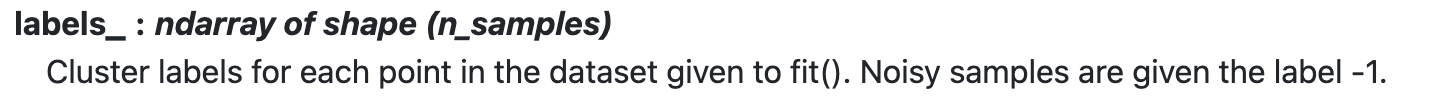

In [65]:
dbsc.labels_

array([0, 0, 0, ..., 2, 1, 2])

## Step 6: Add labels back to original dataframe

In [66]:
# Assign the cluster labels
df_z['zz_labels'] = dbsc.labels_

In [67]:
#see what this dataframe looks like
df_z.sample(5)

customer_id  bathrooms  bedrooms  area county  fullbathcnt    latitude  \
32171      2320404        5.0         3  2679     LA          5.0  33995793.0   
19901      1330339        3.0         3  1606     LA          3.0  34442950.0   
14179        23343        2.0         4  1499     LA          2.0  33844857.0   
331        2470641        2.0         3  2143     LA          2.0  34020983.0   
28359      1092777        2.0         4  1675     LA          2.0  34015533.0   

         longitude  lotsizesquarefeet  regionidcity  regionidcounty  \
32171 -117999704.0            34830.0       45602.0          3101.0   
19901 -118388560.0            15964.0       54311.0          3101.0   
14179 -118374013.0             7534.0       54722.0          3101.0   
331   -117817896.0             7901.0       24384.0          3101.0   
28359 -118441177.0             6479.0       12447.0          3101.0   

       yearbuilt  structuretaxvaluedollarcnt  property_value  assessmentyear  \
32171       1990                    315434.0          364874            2016   
19901       1992                    207106.0          346902            2016   
14179       1959                    207105.0          878131            2016   
331         1971                    175819.0          254873            2016   
28359       1947                    221912.0          942027            2016   

       logerror transactiondate heatingorsystemdesc  \
32171 -0.289334      2017-09-14             Central   
19901 -0.123508      2017-06-16             Central   
14179 -0.085756      2017-05-05             Central   
331    0.213289      2017-01-05             Central   
28359 -0.016755      2017-08-17          Floor/Wall   

             propertylandusedesc  county_Orange  Scaled_customer_id  \
32171  Single Family Residential              0            0.777987   
19901  Single Family Residential              0            0.445832   
14179  Single Family Residential              0            0.007351   
331    Single Family Residential              0            0.828389   
28359  Single Family Residential              0            0.366133   

       Scaled_bathrooms  Scaled_bedrooms  Scaled_area  Scaled_fullbathcnt  \
32171          0.333333         0.272727     0.116040            0.333333   
19901          0.166667         0.272727     0.066768            0.166667   
14179          0.083333         0.363636     0.061854            0.083333   
331            0.083333         0.272727     0.091427            0.083333   
28359          0.083333         0.363636     0.069936            0.083333   

       Scaled_latitude  Scaled_longitude  Scaled_lotsizesquarefeet  \
32171         0.443151          0.679451                  0.012132   
19901         0.745712          0.384369                  0.005469   
14179         0.341022          0.395401                  0.002491   
331           0.460196          0.817413                  0.002621   
28359         0.456507          0.344437                  0.002119   

       Scaled_structuretaxvaluedollarcnt  Scaled_property_value  \
32171                           0.034399               0.014249   
19901                           0.022578               0.013541   
14179                           0.022578               0.034474   
331                             0.019165               0.009915   
28359                           0.024194               0.036992   

       Scaled_assessmentyear  Scaled_logerror  Scaled_county_Orange  zz_labels  
32171                    0.0         0.440200                   0.0         -1  
19901                    0.0         0.456919                   0.0          0  
14179                    0.0         0.460725                   0.0          2  
331                      0.0         0.490876                   0.0          2  
28359                    0.0         0.467682                   0.0          2

# Step 7: Explore

<div class="alert alert-block alert-info">
<b>Remember:</b> 
<br>
    
- <b>-1</b>: refers to data that does <u>not</u> fall into a cluster
- <b>0</b>: refers to data that does fall into a cluster
</div>

In [68]:
#let's see what labels holds
df_z.zz_labels.value_counts()

 2    12851
 1     7412
 0     5139
-1     3947
 3     1773
 5     1183
 6      320
 4      183
Name: zz_labels, dtype: int64

In [69]:
df_z.head()

customer_id  bathrooms  bedrooms  area county  fullbathcnt    latitude  \
0      2288172        3.0         4  2376     LA          3.0  34245180.0   
1       781532        3.0         4  2962     LA          3.0  34145202.0   
2      1246926        3.0         4  3039     LA          3.0  33960230.0   
3      1639362        3.0         4  2540     LA          3.0  34434971.0   
4       571930        1.0         2  1146     LA          1.0  34024040.0   

     longitude  lotsizesquarefeet  regionidcity  regionidcounty  yearbuilt  \
0 -118240722.0            13038.0      396551.0          3101.0       1970   
1 -118179824.0            63000.0       47019.0          3101.0       1950   
2 -118006914.0            20028.0       14634.0          3101.0       1970   
3 -118464390.0            10384.0       54311.0          3101.0       1999   
4 -118159090.0             4657.0       17882.0          3101.0       1939   

   structuretaxvaluedollarcnt  property_value  assessmentyear  logerror  \
0                    108918.0          145143            2016 -0.103410   
1                    276684.0          773303            2016 -0.001011   
2                    177527.0          220583            2016 -0.040966   
3                    271715.0          430108            2016  0.005963   
4                    127960.0          273745            2016 -0.035085   

  transactiondate heatingorsystemdesc        propertylandusedesc  \
0      2017-01-01             Central  Single Family Residential   
1      2017-01-01             Central  Single Family Residential   
2      2017-01-02             Central  Single Family Residential   
3      2017-01-02             Central  Single Family Residential   
4      2017-01-02          Floor/Wall  Single Family Residential   

   county_Orange  Scaled_customer_id  Scaled_bathrooms  Scaled_bedrooms  \
0              0            0.767173          0.166667         0.363636   
1              0            0.261714          0.166667         0.363636   
2              0            0.417848          0.166667         0.363636   
3              0            0.549505          0.166667         0.363636   
4              0            0.191395          0.000000         0.181818   

   Scaled_area  Scaled_fullbathcnt  Scaled_latitude  Scaled_longitude  \
0     0.102126            0.166667         0.611895          0.496552   
1     0.129035            0.166667         0.544245          0.542763   
2     0.132571            0.166667         0.419090          0.673981   
3     0.109657            0.166667         0.740313          0.326820   
4     0.045644            0.000000         0.462265          0.558502   

   Scaled_lotsizesquarefeet  Scaled_structuretaxvaluedollarcnt  \
0                  0.004435                           0.011865   
1                  0.022082                           0.030170   
2                  0.006904                           0.019351   
3                  0.003498                           0.029628   
4                  0.001475                           0.013942   

   Scaled_property_value  Scaled_assessmentyear  Scaled_logerror  \
0               0.005591                    0.0         0.458945   
1               0.030343                    0.0         0.469269   
2               0.008564                    0.0         0.465241   
3               0.016820                    0.0         0.469972   
4               0.010658                    0.0         0.465834   

   Scaled_county_Orange  zz_labels  
0                   0.0          0  
1                   0.0          0  
2                   0.0          0  
3                   0.0          0  
4                   0.0          1

In [70]:
for combination in itertools.combinations(df_new.columns,2):
    print(combination)

('customer_id', 'bathrooms')
('customer_id', 'bedrooms')
('customer_id', 'area')
('customer_id', 'fullbathcnt')
('customer_id', 'latitude')
('customer_id', 'longitude')
('customer_id', 'lotsizesquarefeet')
('customer_id', 'structuretaxvaluedollarcnt')
('customer_id', 'property_value')
('customer_id', 'assessmentyear')
('customer_id', 'logerror')
('customer_id', 'county_Orange')
('bathrooms', 'bedrooms')
('bathrooms', 'area')
('bathrooms', 'fullbathcnt')
('bathrooms', 'latitude')
('bathrooms', 'longitude')
('bathrooms', 'lotsizesquarefeet')
('bathrooms', 'structuretaxvaluedollarcnt')
('bathrooms', 'property_value')
('bathrooms', 'assessmentyear')
('bathrooms', 'logerror')
('bathrooms', 'county_Orange')
('bedrooms', 'area')
('bedrooms', 'fullbathcnt')
('bedrooms', 'latitude')
('bedrooms', 'longitude')
('bedrooms', 'lotsizesquarefeet')
('bedrooms', 'structuretaxvaluedollarcnt')
('bedrooms', 'property_value')
('bedrooms', 'assessmentyear')
('bedrooms', 'logerror')
('bedrooms', 'county_Oran

In [71]:
combination[0]

'logerror'

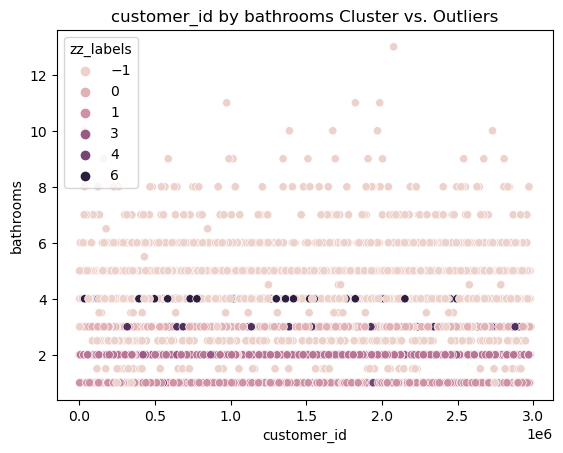

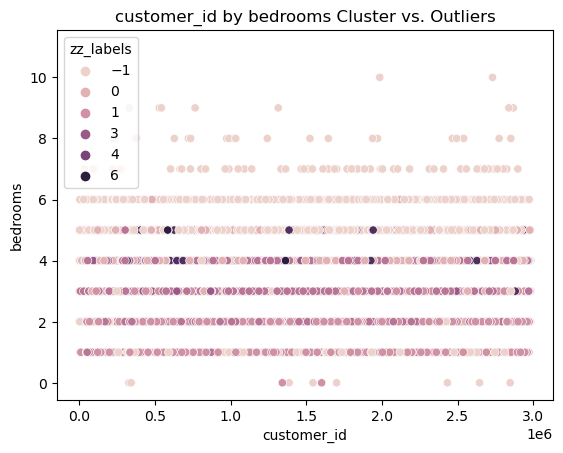

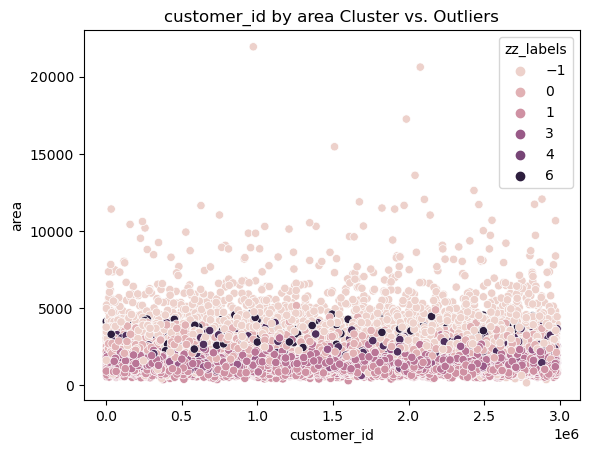

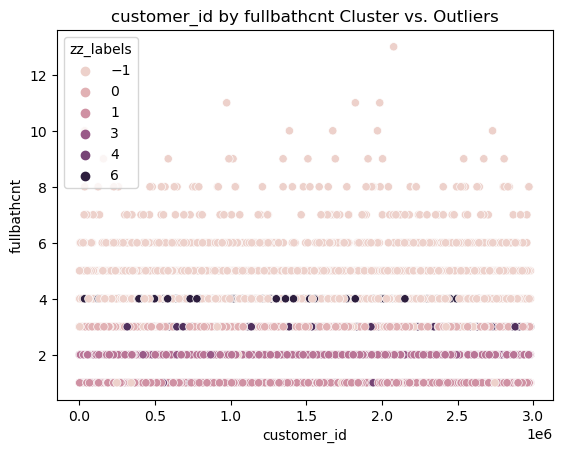

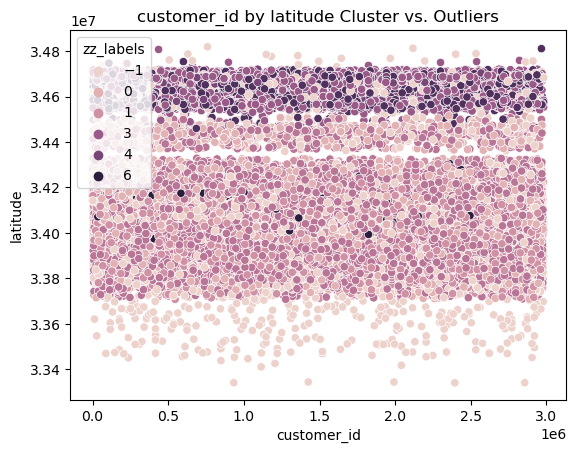

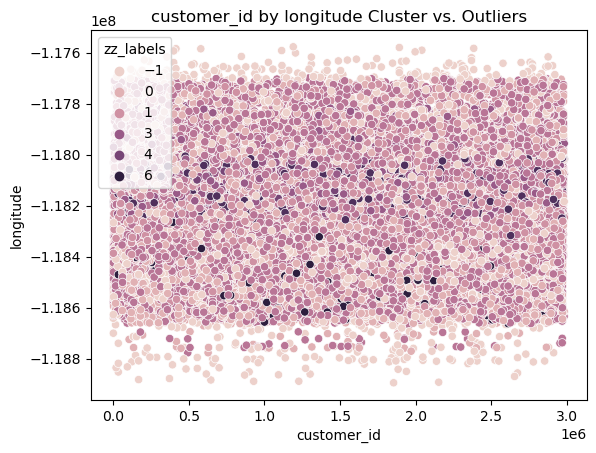

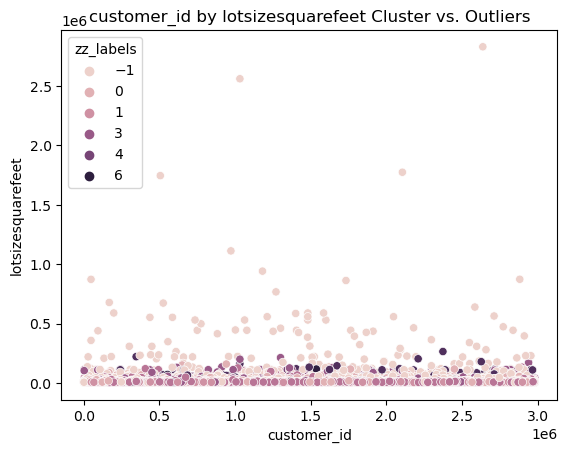

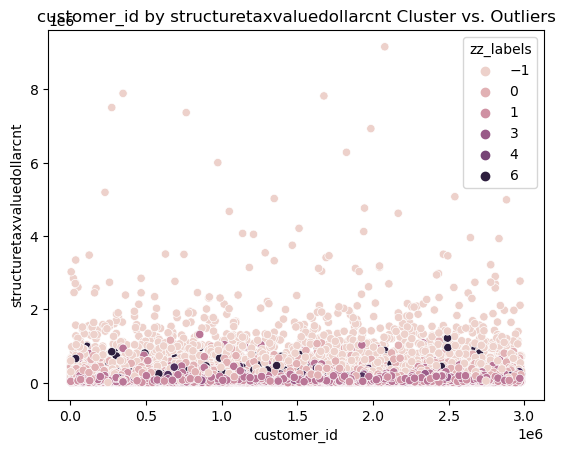

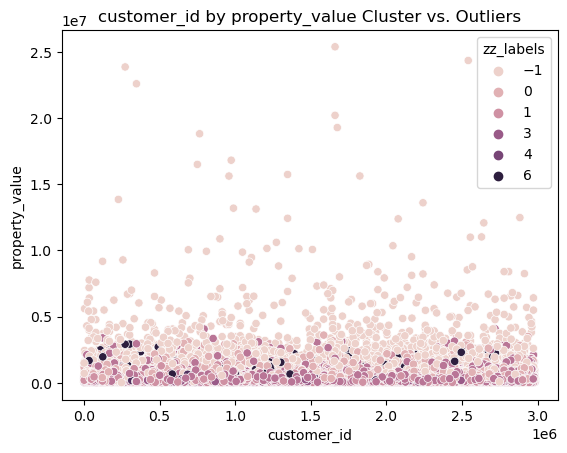

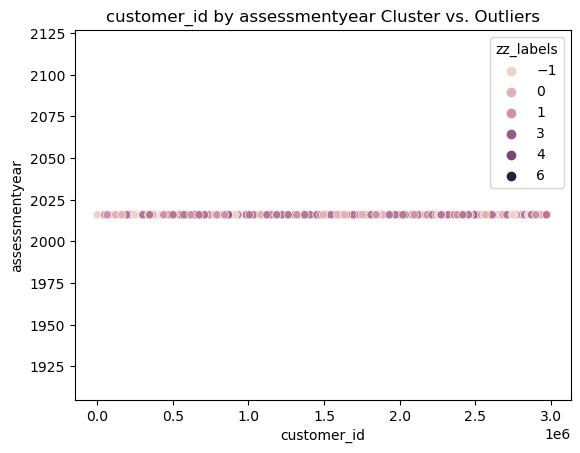

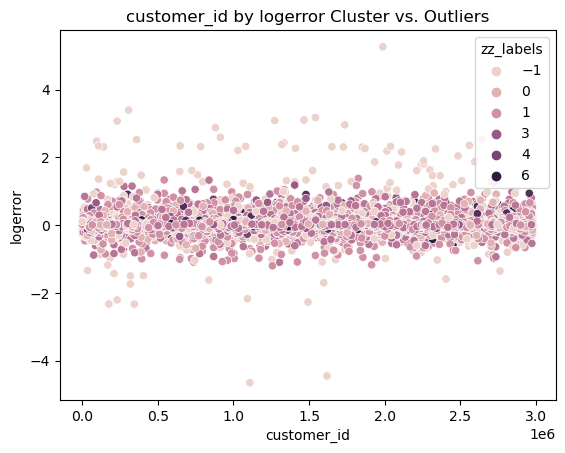

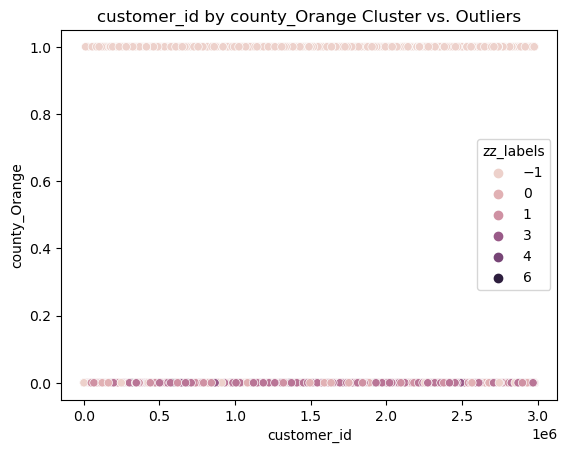

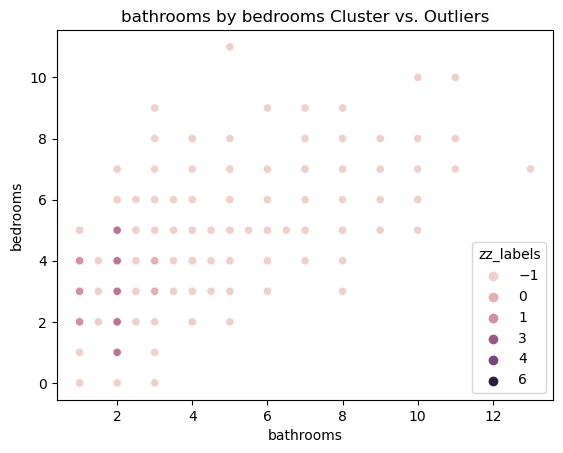

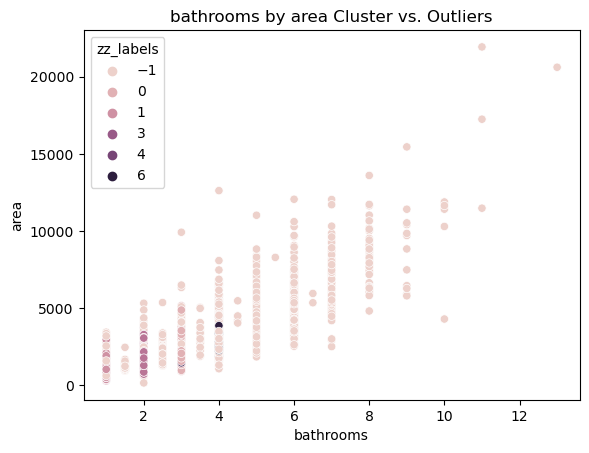

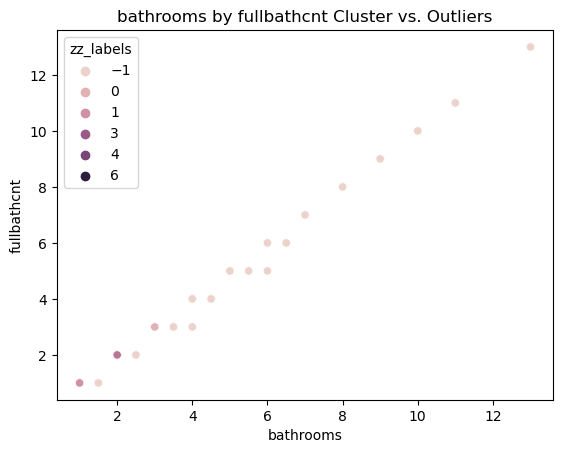

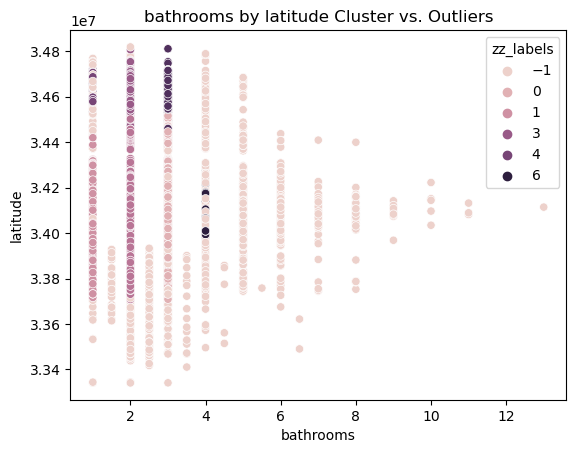

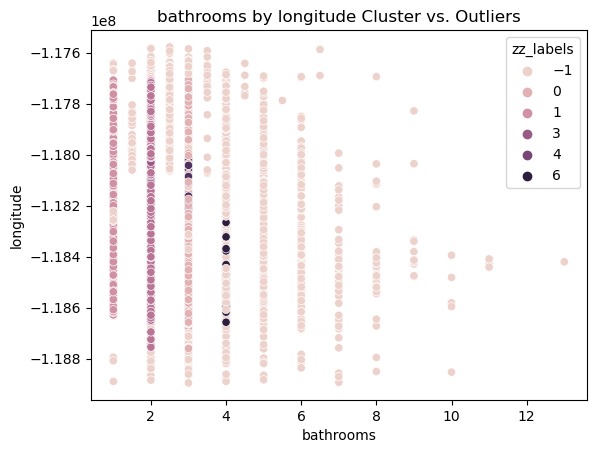

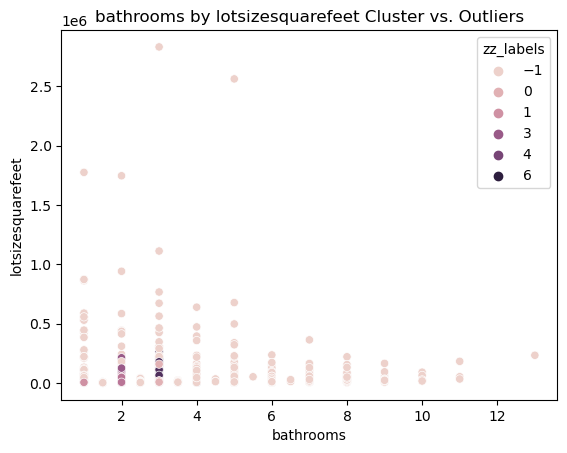

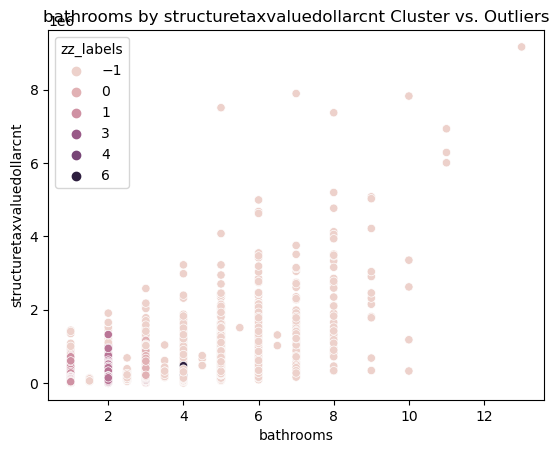

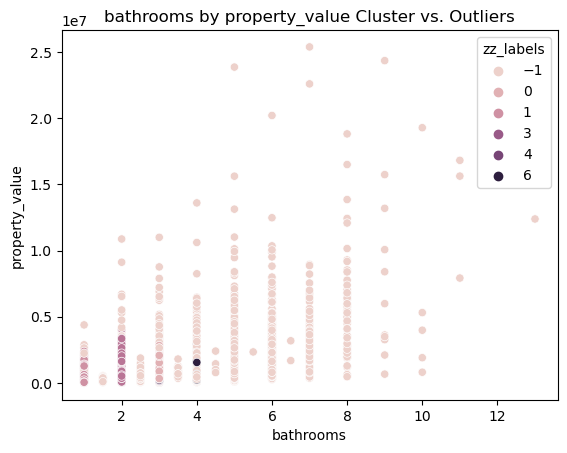

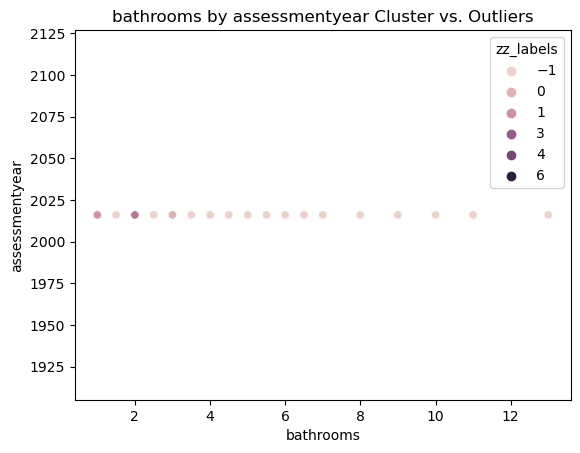

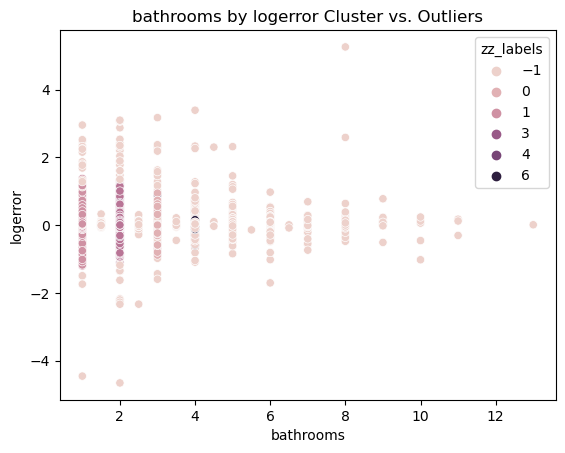

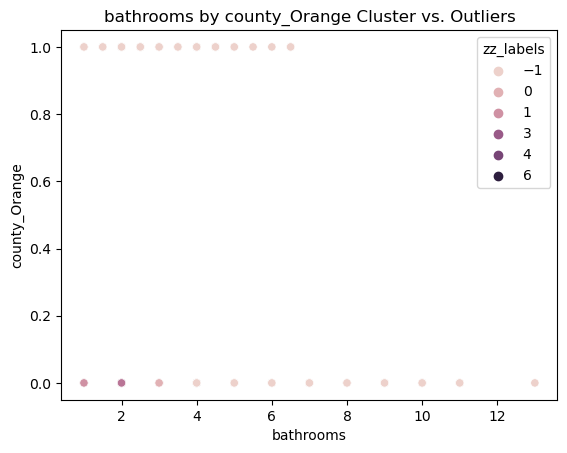

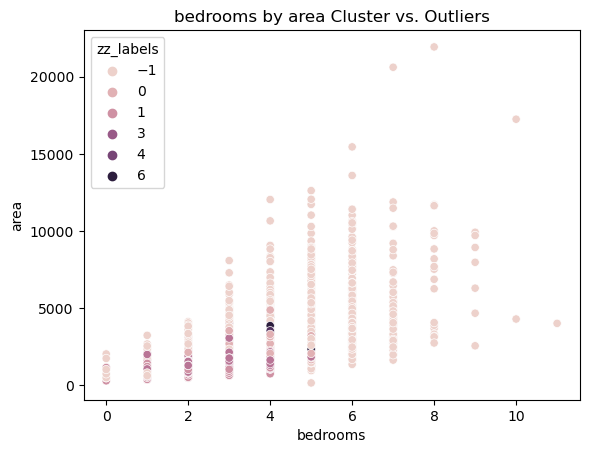

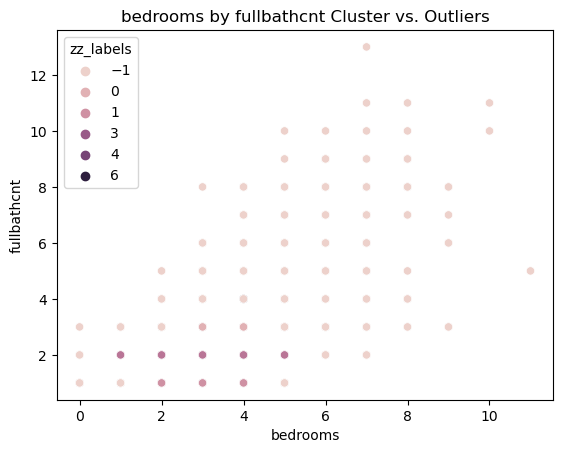

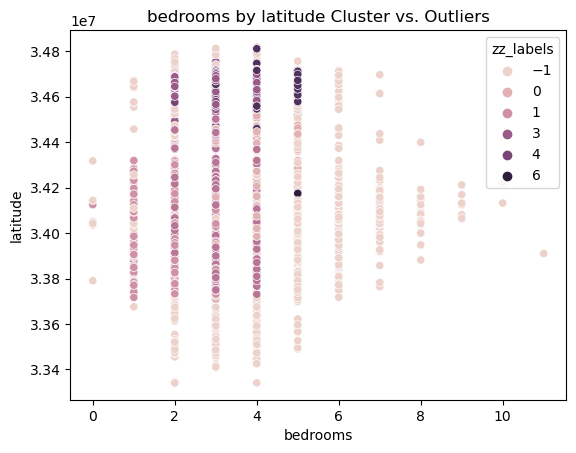

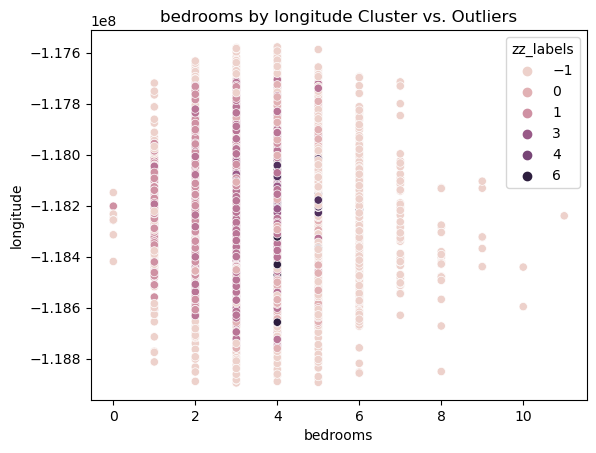

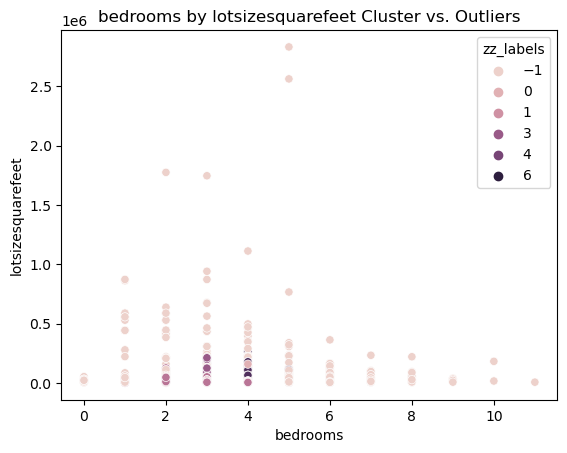

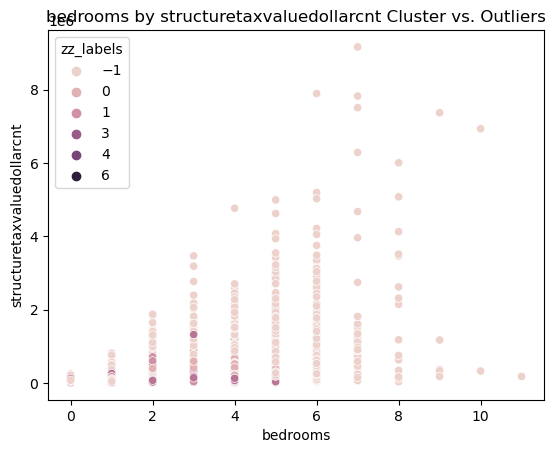

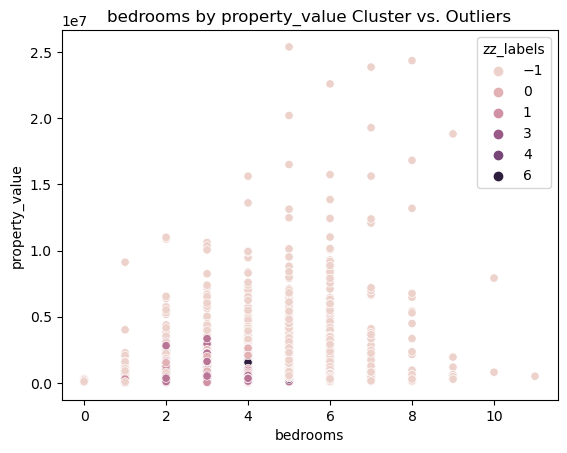

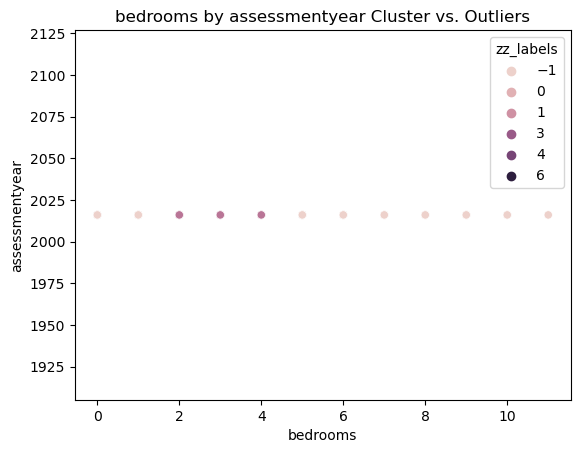

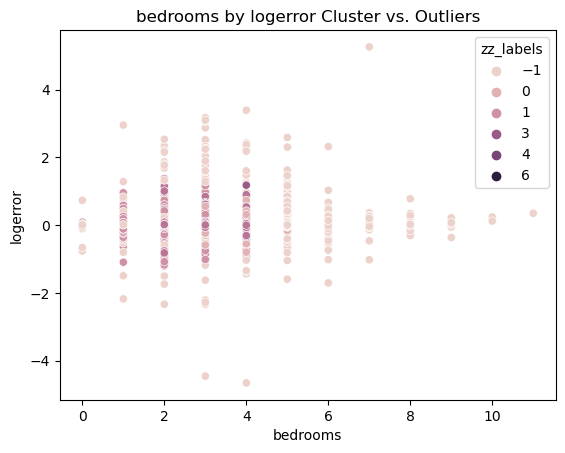

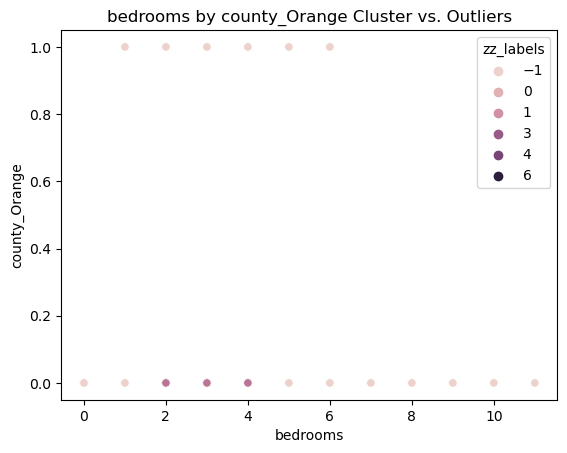

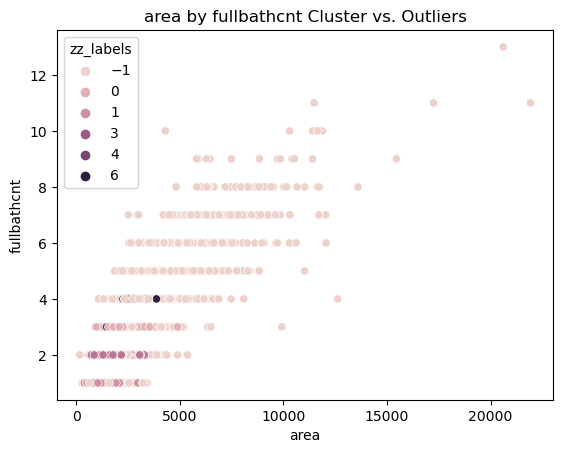

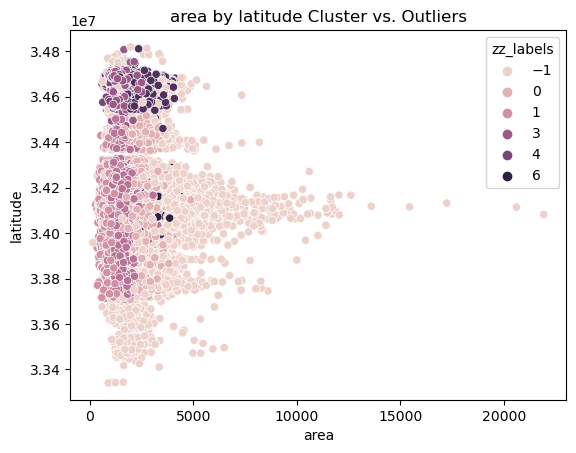

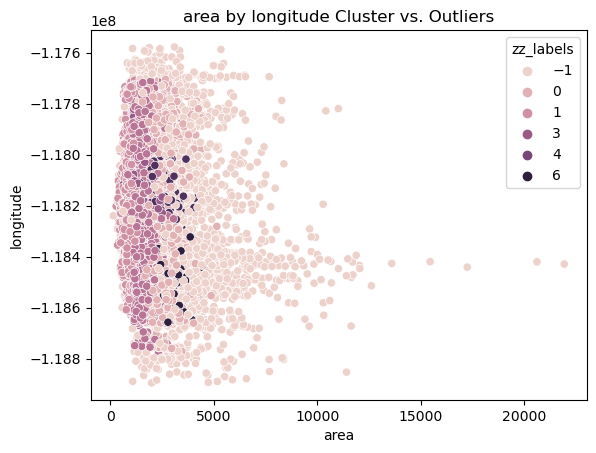

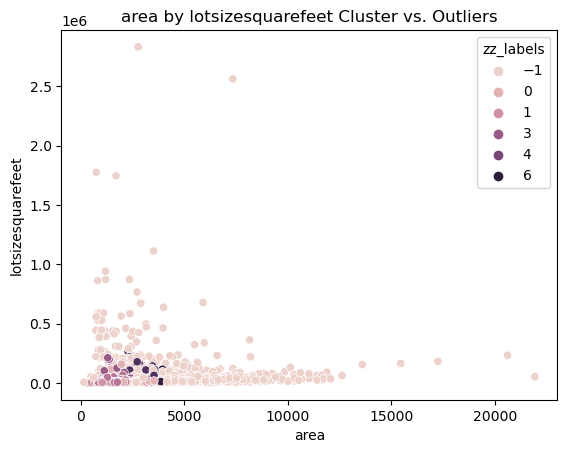

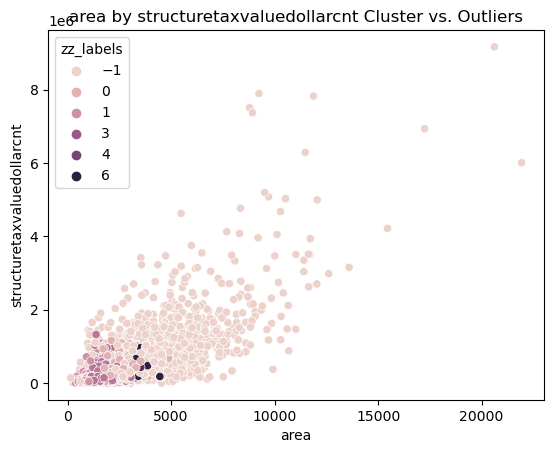

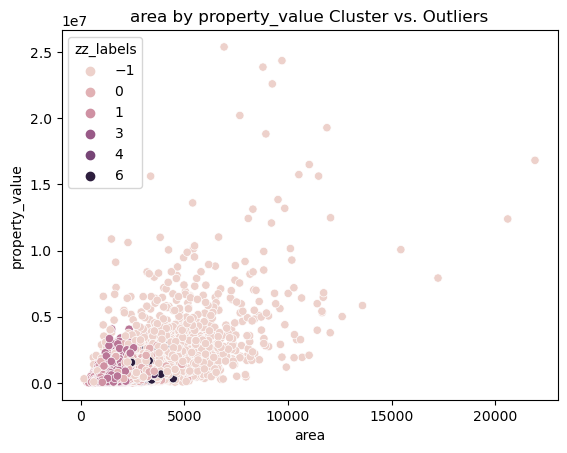

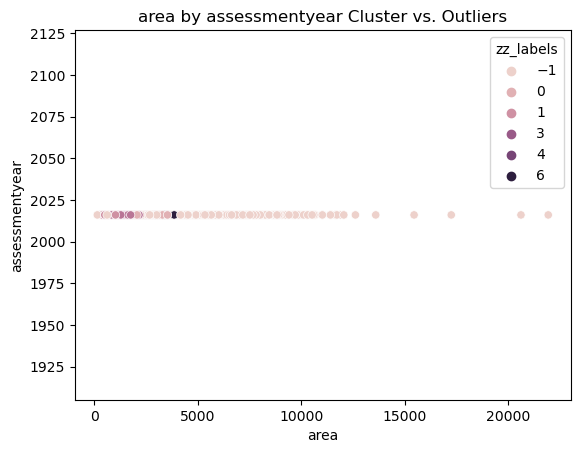

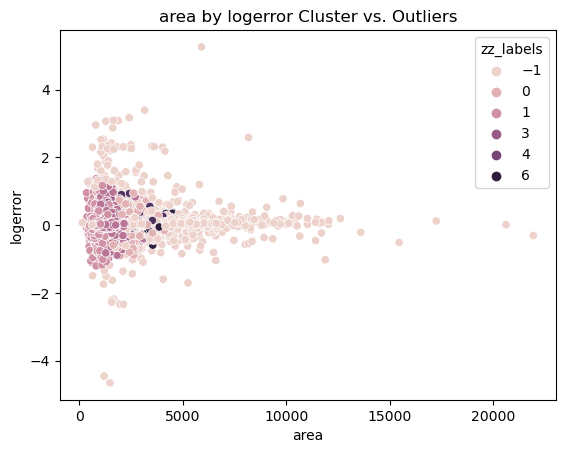

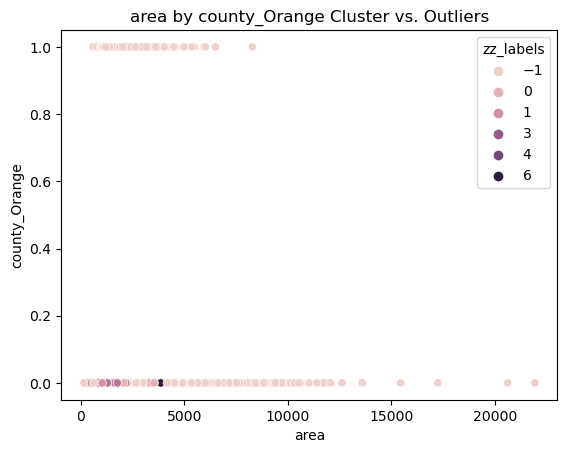

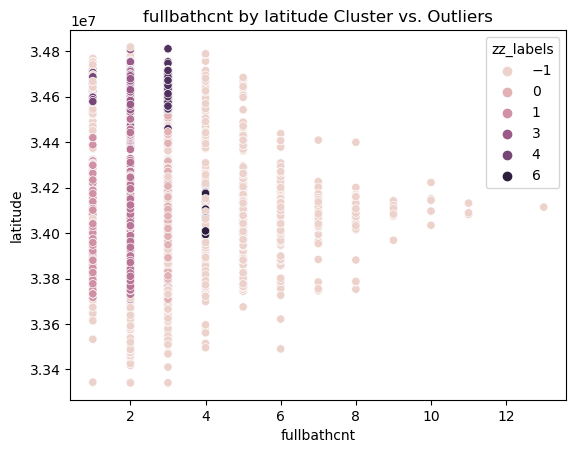

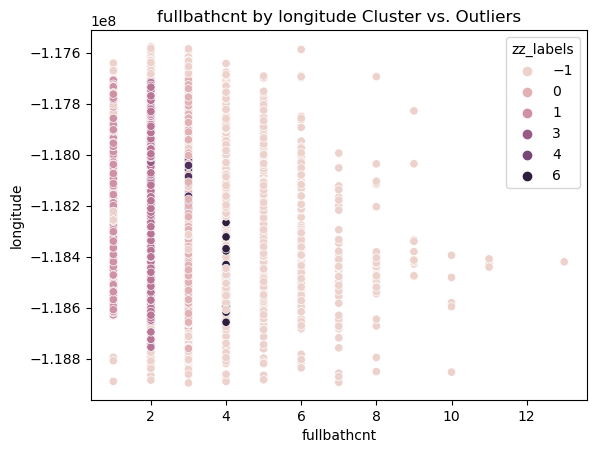

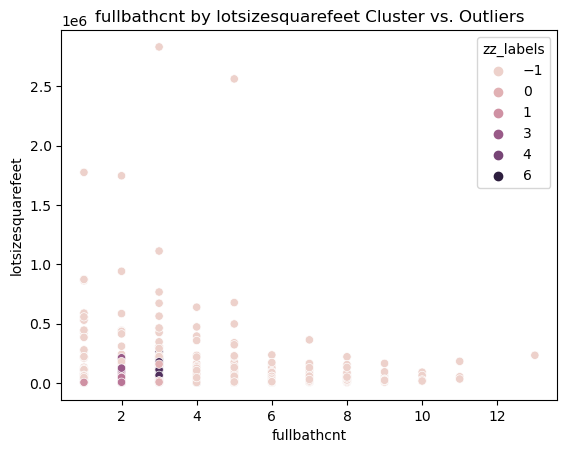

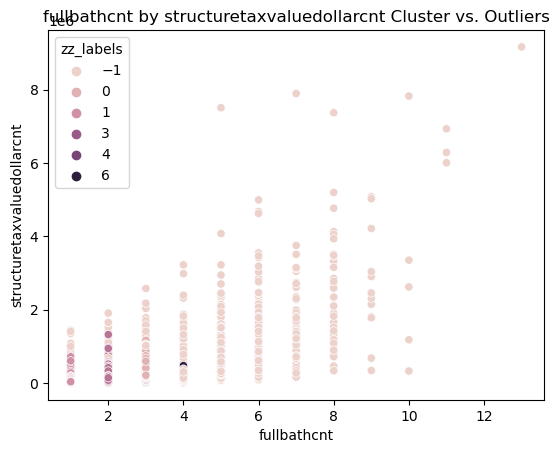

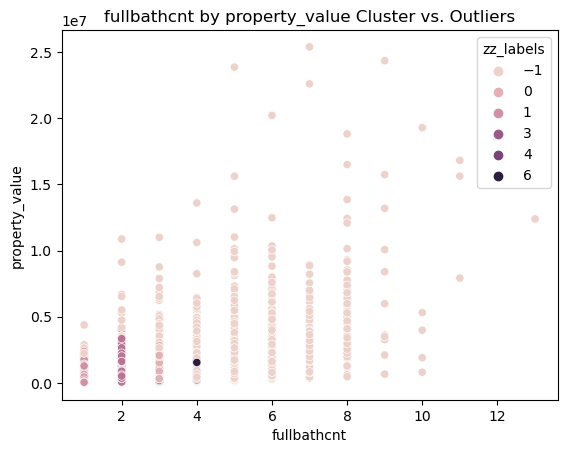

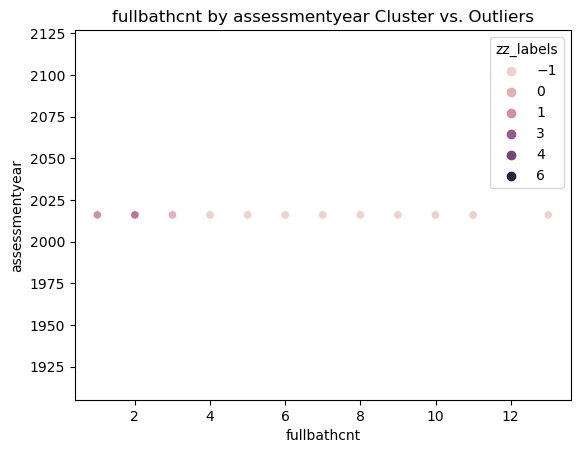

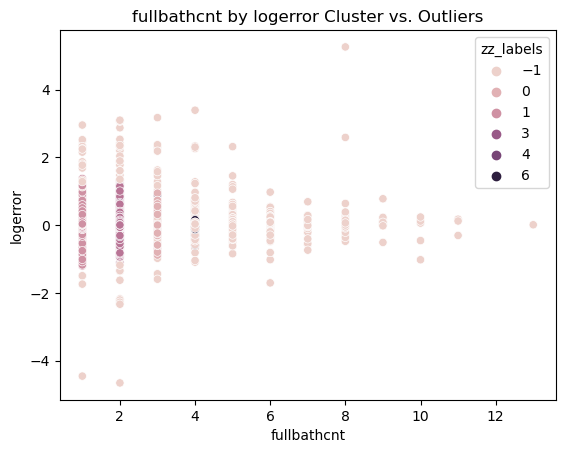

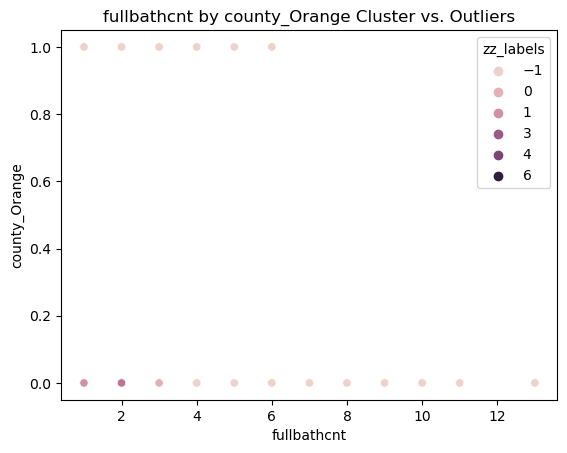

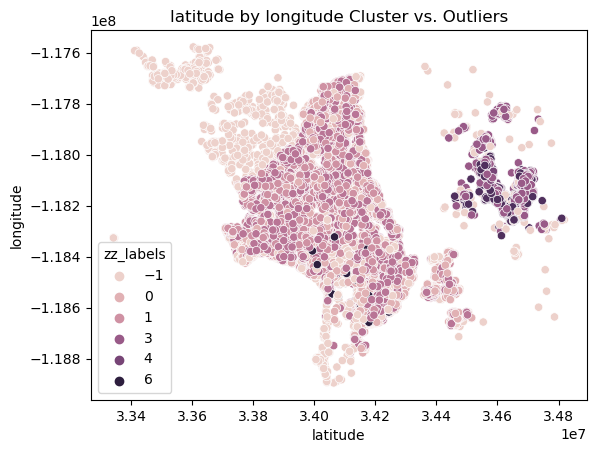

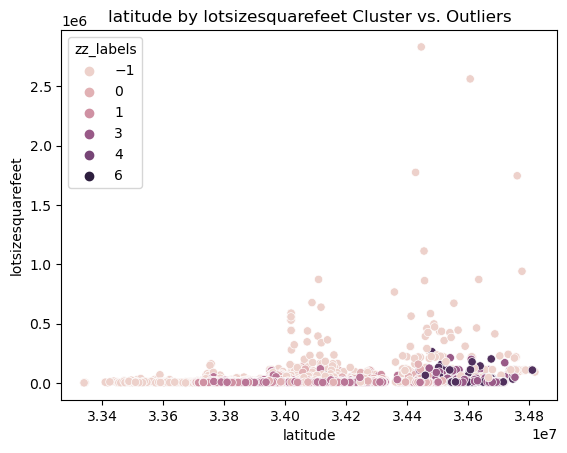

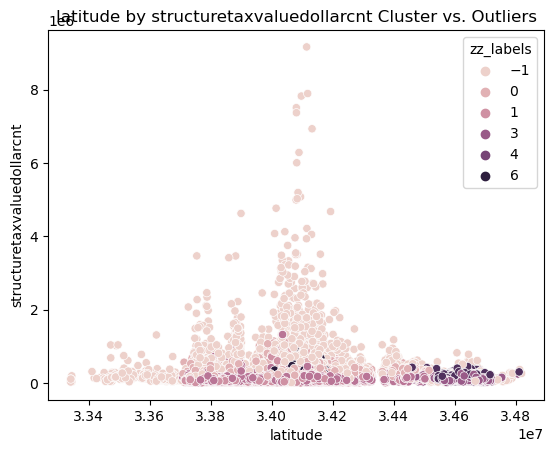

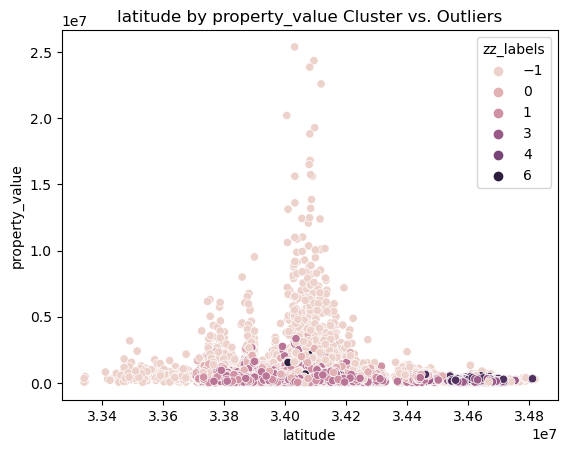

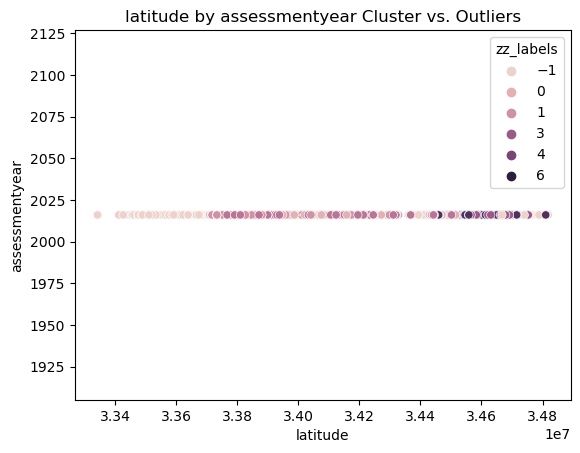

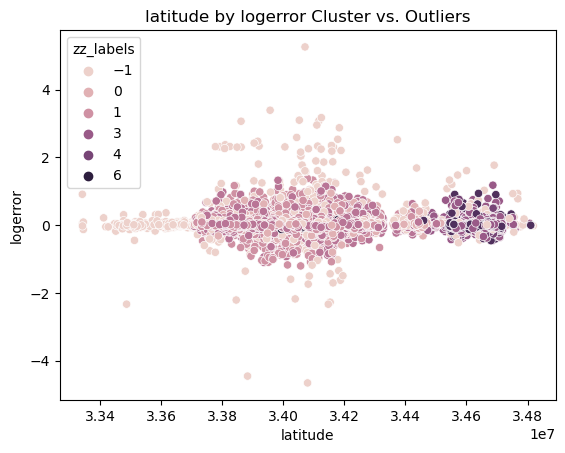

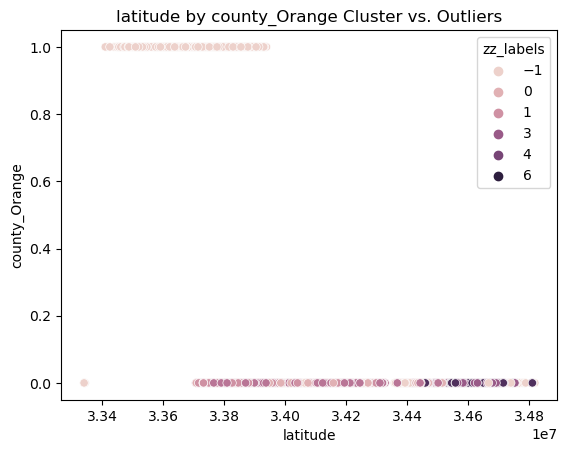

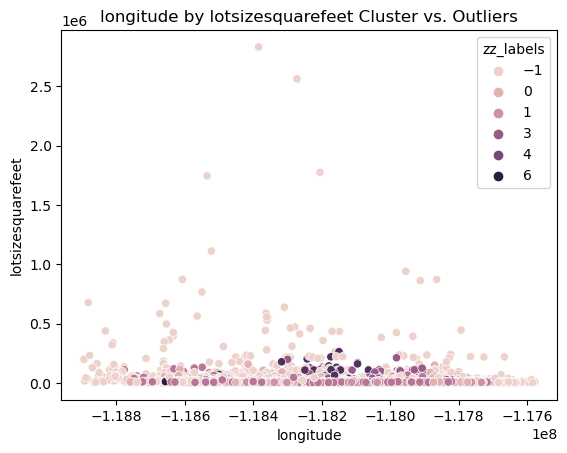

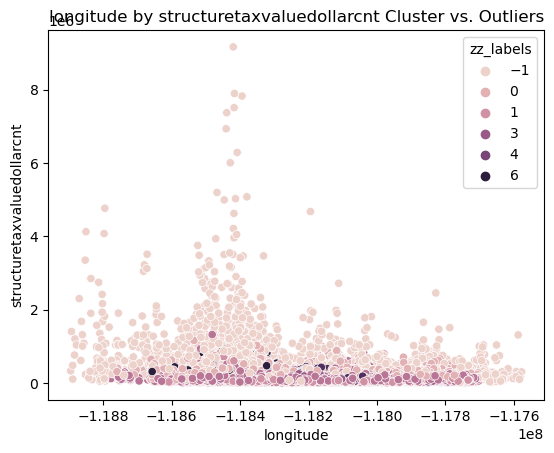

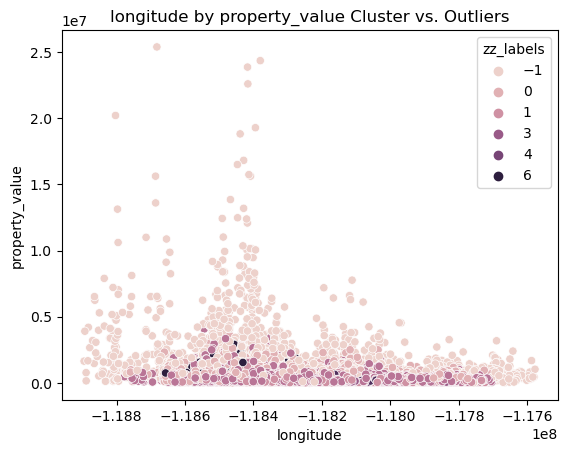

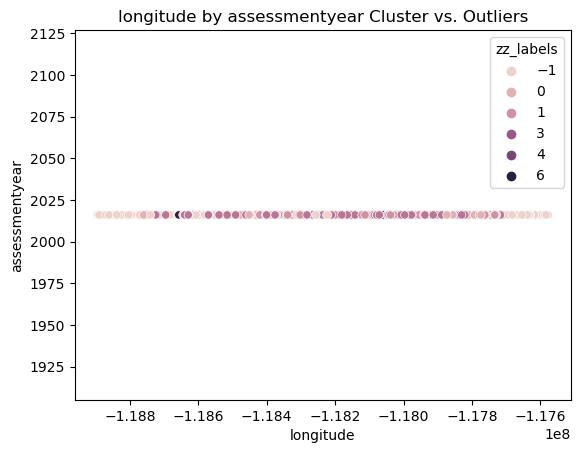

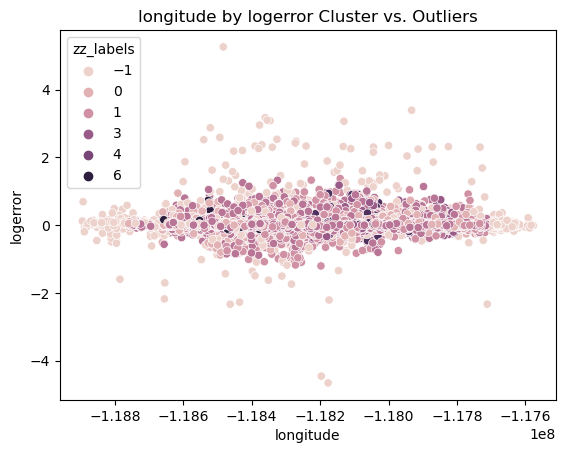

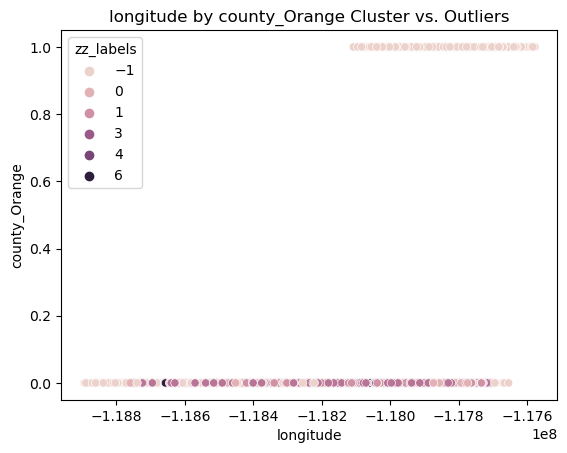

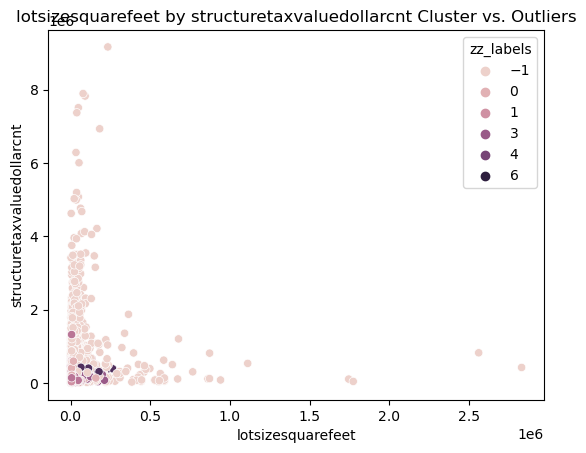

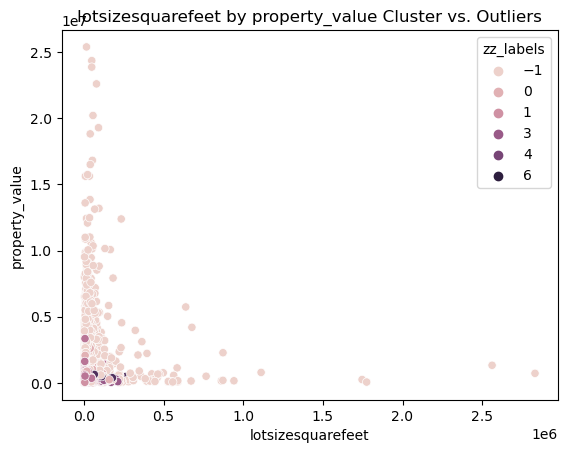

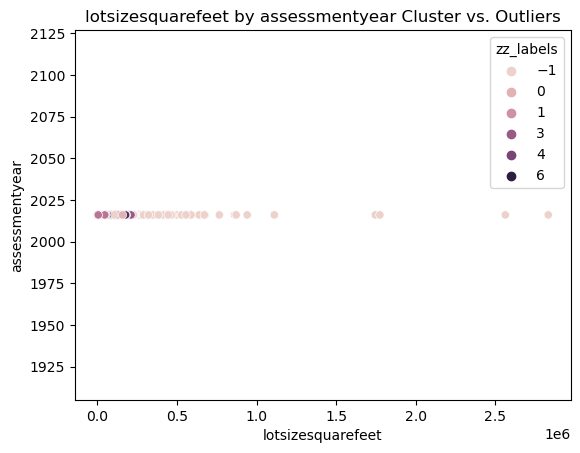

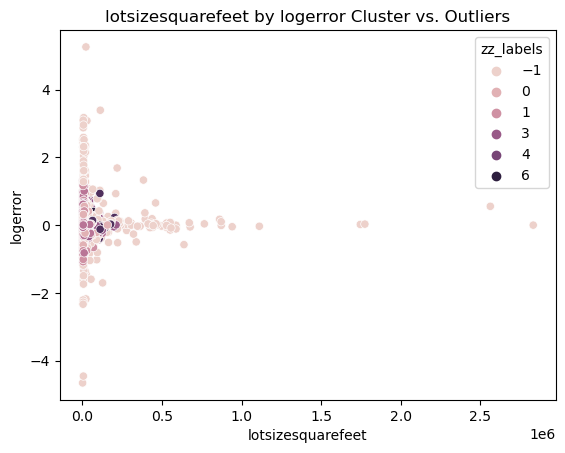

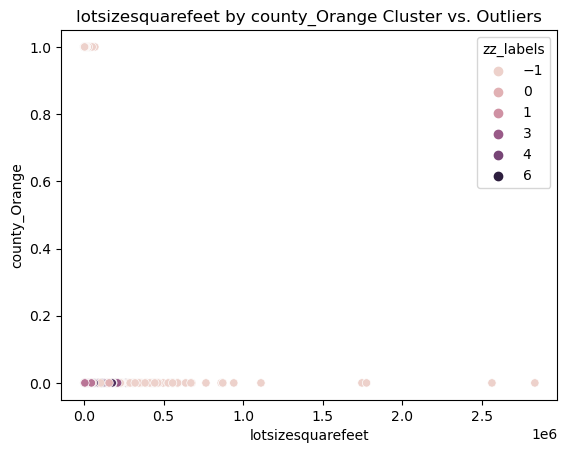

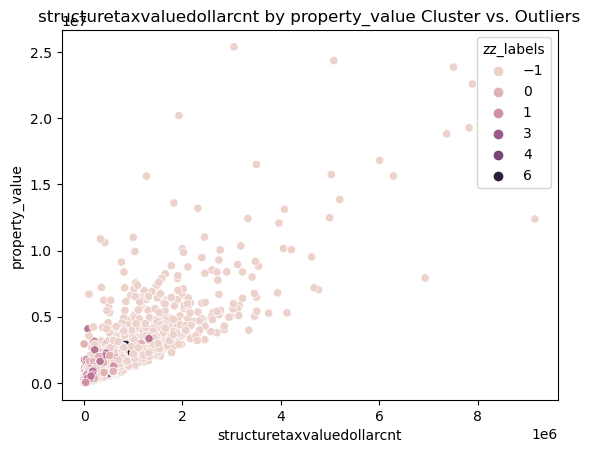

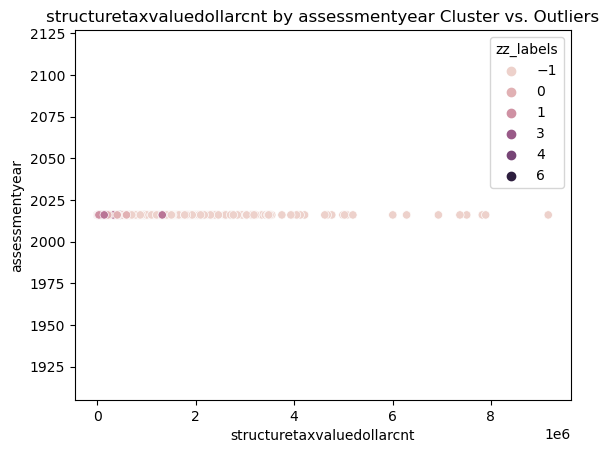

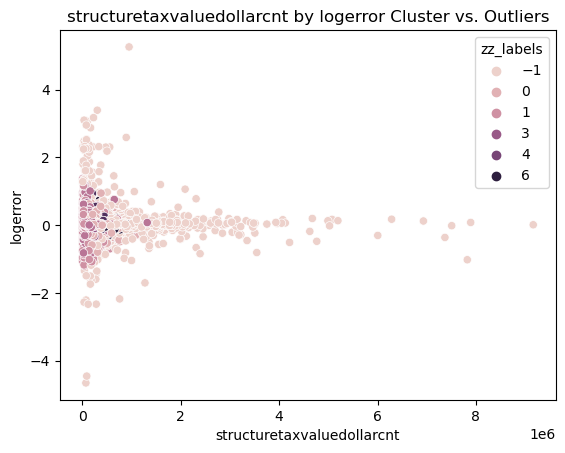

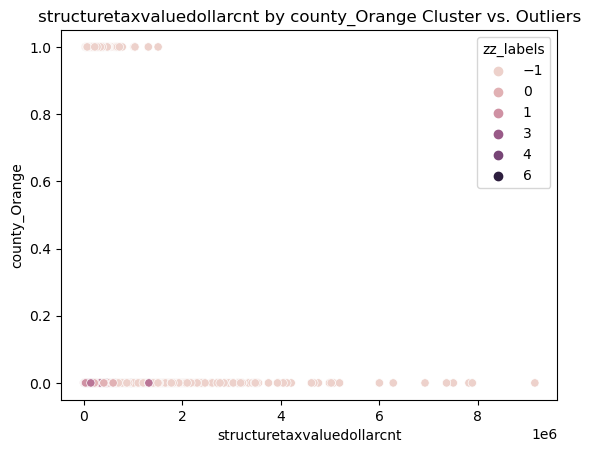

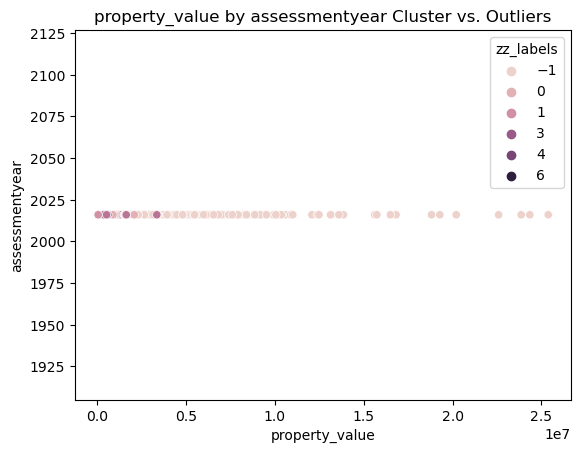

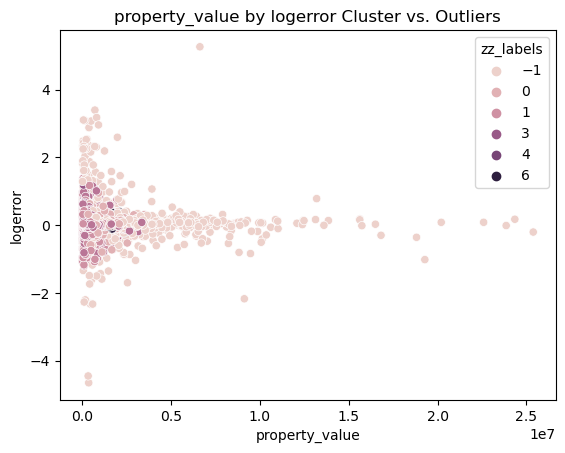

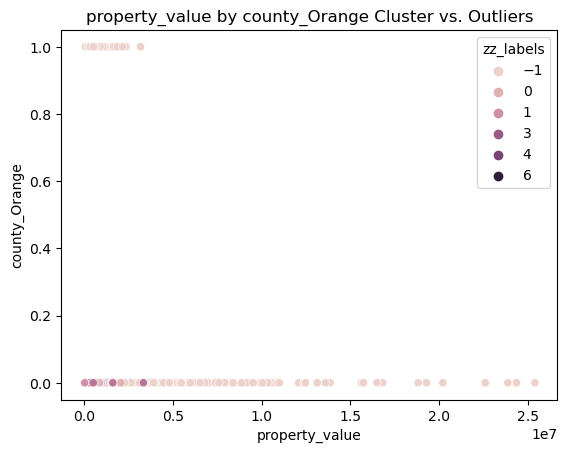

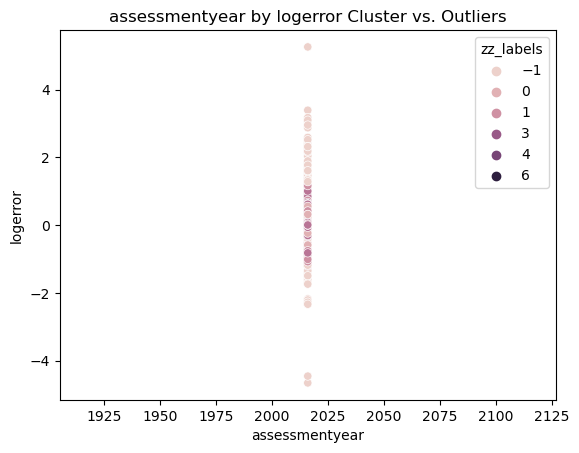

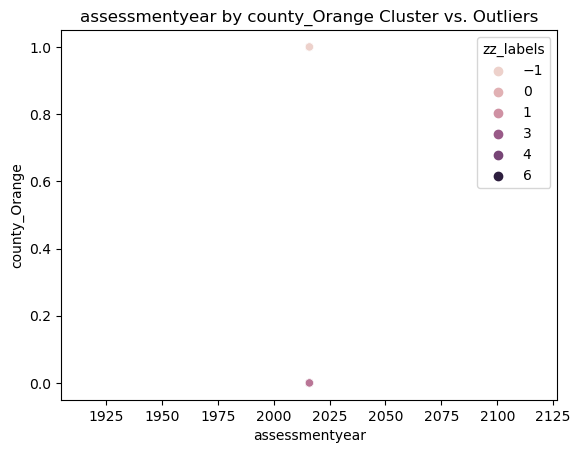

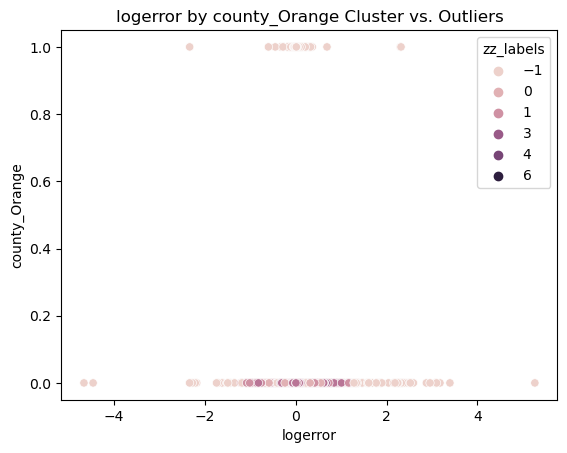

In [73]:
for combination in itertools.combinations(df_new.columns,2):
    sns.scatterplot(df_z[combination[0]], df_z[combination[1]], hue=df_z.zz_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Outliers")
    plt.show()

In [ ]:
# from mpl_toolkits.mplot3d import Axes3D

    
# # Create a figure with a size of 8x8
# fig = plt.figure(1, figsize=(8, 8))

# # Create a 3D axes object with specified rect, elevation, and azimuth
# ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# # Plot the points using the frozen, detergents, delicassen columns from the DataFrame
# # Color the points based on the gmf_labels column and add black edges
# ax.scatter(df.Frozen, df.Detergents_Paper, df.Delicassen, c=df.fdd_labels, edgecolor='k')

# # Remove tick labels for the x-axis, y-axis, and z-axis
# ax.w_xaxis.set_ticklabels([])
# ax.w_yaxis.set_ticklabels([])
# ax.w_zaxis.set_ticklabels([])

# # Set labels for the x-axis, y-axis, and z-axis
# ax.set_xlabel('Frozen')
# ax.set_ylabel('Detergents_Paper ')
# ax.set_zlabel('Delicassen')

# # Display the plot
# plt.show()
